# Data Project - Stock Market Analysis 

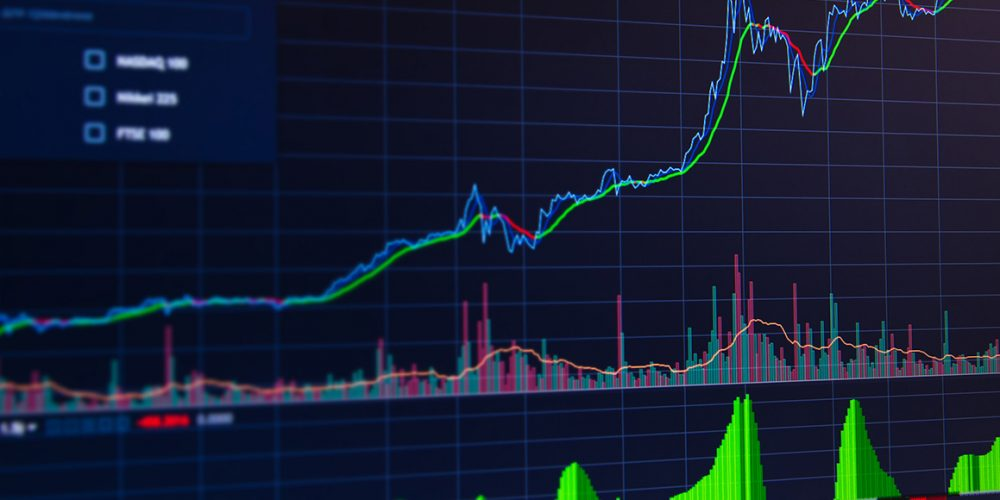

Zeitreihendaten sind eine Reihe von Datenpunkten, die in zeitlicher Reihenfolge indiziert sind. Diese Art von Daten kommt in der Praxis häufig vor, daher ist es für jeden Data Scientist wichtig, den Umgang damit zu beherrschen.

In diesem Notebook werden wir Daten aus dem Aktienmarkt (Apple, Amazon, Google und Microsoft) analysieren und vorhersagen. Diese Vorhersagen können Investoren dabei helfen, bessere Entscheidungen zu treffen.

Als Ausgangspunkt für unsere Ausarbeitung dient dabei das folgende Kaggle Notebook als Quelle: [Stock Market Analysis 📈 + Prediction using LSTM](https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm)

Das Kernelement dieses Jupyter Notebooks ist, passend zum Schwerpunkt von Task B, die Vorhersage von zukünftigen Aktienkursen mithilfe von `Long Short Term Memory (LSTM) Neural Networks`.

Das ganze Notebook wird dabei nach dem CRISP-DM Prozess aufgebaut sein.



## CRISP-DM-Ansatz in der Datenanalyse

In unseren Datenanalysen halten wir uns an die CRISP-DM-Methode (Cross-Industry Standard Process for Data Mining). CRISP-DM ist eine etablierte und weit verbreitete Methode, die einen strukturierten Ansatz für Datenabbau- und Analyseprojekte bietet.

### Warum CRISP-DM?

CRISP-DM bietet einen systematischen und iterativen Prozess, der Geschäftsverständnis, Datenverständnis, Datenvorbereitung, Modellierung, Evaluation und Bereitstellung umfasst. Die Gründe, warum wir uns entscheiden, CRISP-DM in unserem Notebook zu verwenden, sind:

1. **Strukturierter Rahmen:** CRISP-DM bietet einen klaren und strukturierten Rahmen, der dazu beiträgt, den Datenanalyseprozess zu organisieren und zu optimieren. Dies stellt sicher, dass jeder Schritt der Analyse gut definiert ist und in einer logischen Reihenfolge durchgeführt wird. Diese Struktur hilft bei der Aufrechterhaltung von Projektklarheit, insbesondere bei komplexen Analysen, und verbessert die Reproduzierbarkeit unserer Ergebnisse.

2. **Iterativer Charakter:** Die iterative Natur von CRISP-DM ermöglicht es uns, frühere Phasen aufgrund von Erkenntnissen in späteren Phasen zu überarbeiten und zu verfeinern. Diese Flexibilität ist entscheidend, um sich an sich ändernde Projekterfordernisse anzupassen und die Analyse bei zunehmender verfügbarer Information zu verbessern. Dies fördert kontinuierliche Verbesserungen und ermöglicht es uns, die Genauigkeit und Relevanz unserer analytischen Modelle im Laufe der Zeit zu steigern.

3. **Kollaborativer Ansatz:** CRISP-DM fördert die Zusammenarbeit zwischen Teammitgliedern und Stakeholdern, indem es die Rollen und Verantwortlichkeiten in jeder Phase klar definiert. Dieser kollaborative Aspekt verbessert die Kommunikation und stellt sicher, dass das gesamte Team auf die Projektziele ausgerichtet ist. Durch die Förderung von Teamarbeit unterstützt CRISP-DM die Integration unterschiedlicher Fachkenntnisse und führt zu umfassenderen und effektiveren Analysen.

4. **Risikomanagement:** Durch die Untergliederung des Analyseprozesses in verschiedene Phasen ermöglicht CRISP-DM ein effektives Risikomanagement. Die Identifizierung potenzieller Herausforderungen früh im Prozess ermöglicht es uns, Risiken zu minimieren und fundierte Entscheidungen zu treffen, um den Projekterfolg sicherzustellen. Diese proaktive Herangehensweise an das Risikomanagement ist besonders wertvoll in dynamischen Umgebungen, in denen Unsicherheiten und unvorhergesehene Probleme auftreten können.

5. **Branchenstandard:** CRISP-DM wird weitgehend als Branchenstandard für Datenabbau und -analyse anerkannt. Durch die Einhaltung dieser etablierten Methode stimmen wir unsere Praktiken mit bewährten Branchenpraktiken ab, erleichtern die Kommunikation mit externen Stakeholdern und erhöhen die Glaubwürdigkeit unserer Analysen.

Zusammenfassend dient der CRISP-DM-Ansatz als Leitfaden für unsere Datenanalyse, indem er eine strukturierte, anpassbare und kollaborative Methodologie bietet, um wertvolle Erkenntnisse aus unseren Datensätzen zu gewinnen.


## Fragestellungen

Unser ziel der Task B ist es folgende Fragen zu beantworten

    1.) Wie hat sich der Preis der Aktie im Laufe der Zeit verändert?
    2.) Wie war die durchschnittliche Tagesrendite der Aktie?
    3.) Wie war der gleitende Durchschnitt der verschiedenen Aktien?
    4.) Wie war die Korrelation zwischen verschiedenen Aktien?
    5.) Wie viel Wert setzen wir bei der Investition in eine bestimmte Aktie aufs Spiel?
    6.) Wie können wir versuchen, zukünftiges Aktienverhalten vorherzusagen? (Vorhersage des Schlusskurspreises der APPLE Inc. Aktie mit LSTM)

***

## Setup des Notebooks

In [191]:
# Installation aller benötigten Python Pakete (danach bitte Kernel neu starten, damit die Pakete auch im Jupyter Notebook verfügbar sind)
# requirements.txt muss im gleichen Ordner wie das Notebook liegen
# Installation könnte längere Zeit in Anspruch nehmen (je nach Internetverbindung und Rechenleistung des Rechners 2-10 Minuten) 
# %pip install --user --force-reinstall -r requirements.txt 

#--force-reinstall falls sorgt dafür, dass die Pakete auf die entsprechende Version aktualisiert werden, falls sie bereits installiert sind. --user gibt an, dass man das nur für den aktuellen User installiert und umgeht die Admnistratorrechte.

#----------------------------------------------------------
# Alternativ: alle Packages manuell installieren: (kommentierte Zeilen entkommentieren und ausführen)
#%pip install pandas numpy scipy

# Installation der Visualisierungsbibliotheken
#%pip install matplotlib seaborn plotly

# Installation der Bibliotheken für die Datenbeschaffung
#%pip install yfinance pandas_datareader

# Installation der Bibliotheken für das Neuronale Netzwerk
#%pip install scikit-learn tensorflow keras

# Installation weiterer Bibliotheken
#%pip install IPython ipywidgets nbformat pydot watermark

# Daneben müsste man noch die Bibliothek graphviz installieren, falls man die Modelarchitektur des Neuronalen Netzwerks visualisieren möchte: https://graphviz.gitlab.io/download/ (ist jedoch optional)

In [192]:
# Iportieren der Standardbibliotheken
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime, date
import itertools
from IPython.display import Image

# Iportieren der Visualisierungsbibliotheken
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.graph_objects as go

# Importieren der Bibliotheken für die Datenbeschaffung
from pandas_datareader.data import DataReader  # Zum Abrufen von Finanzdaten aus verschiedenen Internetquellen
from pandas_datareader import data as pdr  # Alternative Schnittstelle für das Abrufen von Finanzdaten
import yfinance as yf  # Bietet Zugang zu Finanzdaten von Yahoo Finance
yf.pdr_override()  # Ersetzt Standardmethoden von pandas_datareader durch yfinance Methoden für verbesserte Datenabruf-Funktionen

# Importieren der Bibiotheken für das Neuronale Netzwerk
from sklearn.preprocessing import MinMaxScaler  # Skaliert Features für die Optimierung des neuronalen Netzwerks
import tensorflow as tf  # Hauptbibliothek für maschinelles Lernen und neuronale Netzwerke
from keras.callbacks import EarlyStopping  # Verhindert Overfitting durch frühzeitigen Stopp des Trainings
from keras.callbacks import ModelCheckpoint  # Speichert das beste Modell während des Trainings
from keras.models import Sequential  # Ermöglicht das Erstellen sequenzieller neuronaler Netzwerkmodelle
from keras.layers import Dense, LSTM, GRU, Dropout  # Verschiedene Netzwerkschichten, inkl. LSTM für Zeitreihenanalyse
from keras.utils import plot_model  # Visualisiert die Struktur des neuronalen Netzwerks

# Interactive Notebook
import ipywidgets as widgets  # Ermöglicht interaktive Elemente im Jupyter Notebook
from ipywidgets import interact, interact_manual  # Ermöglicht die Erstellung benutzerdefinierter interaktiver Schnittstellen

# Importieren weiterer Bibliotheken
import warnings  # Zum Verwalten von Warnungen
from IPython.display import display  # Für die Anzeige von Outputs in Jupyter Notebooks
import watermark  # Wird verwendet, um Versionsinformationen der Bibliotheken anzuzeigen

In [193]:
# vordefinierte Einstellungen für die Visualisierung
sns.set_style('whitegrid')

# Setze den Stil von Seaborn für eine ästhetische Darstellung
sns.set(style="whitegrid")

plt.style.use("fivethirtyeight")
%matplotlib inline

## Datenbeschaffung
Der erste Schritt besteht darin, die Daten zu beschaffen und in unseren Arbeitsspeicher zu laden. 
Wir werden unsere Aktiendaten von der Yahoo Finance-Website beziehen. 

Yahoo Finance ist eine beliebte Quelle für Finanzmarktdaten und Tools zur Suche nach überzeugenden Investitionen. 
Um die Daten von Yahoo Finance zu erhalten, werden wir die yfinance-Bibliothek verwenden, die es recht einfach macht, Marktdaten von Yahoo herunterzuladen. 
Mehr zur Yahoo Finance Python API: [Zuverlässiger Download von historischen Marktdaten mit Python](https://aroussi.com/post/python-yahoo-finance)

In [194]:
# Die Tech-Aktien, die wir für diese Analyse verwenden
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Festlegen von End- und Startzeiten für den Datenaufgriff set 
end = datetime(2024, 1, 8) # sollten wir standardisieren, damit es vergleichbar ist datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Datendownload für jede Tech-Aktie im angegebenen Zeitraum
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
# Liste der Unternehmen und deren Namen
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Zuordnen der Unternehmensnamen zu den entsprechenden Datenframes
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
# Zusammenführen der Datenframes zu einem Gesamtdatenframe
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close   
Date                                                                     
2023-12-21  153.300003  153.970001  152.100006  153.839996  153.839996  \
2023-12-22  153.770004  154.350006  152.710007  153.419998  153.419998   
2023-12-26  153.559998  153.979996  153.029999  153.410004  153.410004   
2023-12-27  153.559998  154.779999  153.119995  153.339996  153.339996   
2023-12-28  153.720001  154.080002  152.949997  153.380005  153.380005   
2023-12-29  153.100006  153.889999  151.029999  151.940002  151.940002   
2024-01-02  151.539993  152.380005  148.389999  149.929993  149.929993   
2024-01-03  149.199997  151.050003  148.330002  148.470001  148.470001   
2024-01-04  145.589996  147.380005  144.050003  144.570007  144.570007   
2024-01-05  144.690002  146.589996  144.529999  145.240005  145.240005   

              Volume company_name  
Date                               
2023-12-21  36305700       AMAZON  
2023-12-22  29480100       AMAZON  
2023-12-26  25067200       AMAZON  
2023-12-27  31434700       AMAZON  
2023-12-28  27057000       AMAZON  
2023-12-29  39789000       AMAZON  
2024-01-02  47339400       AMAZON  
2024-01-03  49425500       AMAZON  
2024-01-04  56039800       AMAZON  
2024-01-05  45124800       AMAZON

# Business Understanding

## Einführung

Der betrachtete Datensatz bietet einen umfassenden Überblick über die Dynamik von Aktienkursen während eines bestimmten Zeitraums. Er umfasst 1000 Einträge, von denen jeder einem bestimmten Datum entspricht. Der Datensatz enthält wichtige Finanzindikatoren, die für das Verständnis der Leistung verschiedener Unternehmen an der Börse von entscheidender Bedeutung sind. Diese Informationen sind für Stakeholder wie Investoren, Händler und Finanzanalysten unerlässlich, um fundierte Entscheidungen zu treffen.

## Datensatzüberblick

### Struktur

Der Datensatz umfasst folgende Spalten:

- **Open:** Stellt den Eröffnungspreis einer Aktie an einem bestimmten Datum dar.
- **High:** Bezeichnet den höchsten Preis, den die Aktie an einem bestimmten Datum erreicht hat.
- **Low:** Gibt den niedrigsten Preis an, den die Aktie an einem bestimmten Datum erreicht hat.
- **Close:** Zeigt den Schlusskurs der Aktie an einem bestimmten Datum an.
- **Adj Close:** Spiegelt den angepassten Schlusskurs der Aktie an einem bestimmten Datum wider, unter Berücksichtigung von Faktoren wie Dividenden und Aktiensplits.
- **Volume:** Quantifiziert das Handelsvolumen der Aktie an einem bestimmten Datum und bietet Einblicke in die Marktaktivität.

### Zusätzliche Informationen

- **Firmenname:** Identifiziert das Unternehmen, das mit der Aktie verbunden ist, und ermöglicht die Analyse einzelner Aktien im Datensatz.


# Data Understanding
Wenn wir den Inhalt unserer Daten überprüfen, stellen wir fest, dass die Daten numerisch sind und das Datum der Index der Daten ist. Interessant ist auch, dass Wochenenden in den Aufzeichnungen fehlen.

Jetzt, da wir unsere Daten haben, führen wir einige grundlegende Analysen durch, um unsere Daten besser zu verstehen.

## Explorative Datenanalyse
Die explorative Datenanalyse ist ein kritischer Schritt im Datenverarbeitungsprozess, bei dem es darum geht, Muster, Anomalien und Strukturen in den Daten zu erkennen. Diese Analyseform verwendet verschiedene statistische Techniken und Visualisierungswerkzeuge, um tiefergehende Einblicke in die Datensätze zu gewinnen. Dafuer werden wir zunaechst eine Algemeine Analyse des Datensatzes durchfuehren und daraufhin die Fragen 1. bis 5. beantworten.

### Allgemeine Analyse des Datensatzes
Die `.info()`-Methode in Pandas gibt einen Überblick über die Struktur und den Speicherbedarf eines DataFrames. Sie liefert Informationen wie die Anzahl der Einträge, Datentypen der Spalten, Nicht-Null-Werte pro Spalte und den insgesamten Speicherplatz, den der DataFrame belegt. Dies ist nützlich, um schnell einen Einblick in den Datensatz zu erhalten und mögliche Bereinigungen oder Anpassungen vorzunehmen.

In [195]:
# Generelle Informationen über den Datensatz
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-09 to 2024-01-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1000 non-null   float64
 1   High          1000 non-null   float64
 2   Low           1000 non-null   float64
 3   Close         1000 non-null   float64
 4   Adj Close     1000 non-null   float64
 5   Volume        1000 non-null   int64  
 6   company_name  1000 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.5+ KB


`.describe()` erzeugt einige der für uns wichtigsten Statistiken. Deskriptive Statistiken umfassen alle Informationen, die den Mittelwert, Streuung und Form der Verteilung eines Datensatzes zusammenfassen. Da wir nur mit Aktienkursen arbeiten, haben wir hier glücklicherweise nur numerische Daten.

Hier ist zu beachten, dass wir nur 1000 Beobachtungen gesamt haben.

Wir sehen, dass unsere Werte glücklicherweise keine Nullwerte haben und bereits den richtigen Datentyp zu besitzen scheinen.

In [196]:
# Wichtigesten Kennzahlen des Datensatzes
df.describe()

Open         High          Low        Close    Adj Close   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  \
mean    182.863036   184.797368   181.197048   183.109375   182.708847   
std      83.577545    84.163222    82.901162    83.546838    83.162132   
min      86.720001    89.474998    86.699997    87.360001    87.360001   
25%     125.970001   127.367502   124.302500   125.937500   125.937500   
50%     146.904999   147.790001   145.369995   146.880005   146.847229   
75%     205.127502   207.524998   204.352501   205.362499   204.863461   
max     383.760010   384.299988   378.160004   382.700012   382.700012   

             Volume  
count  1.000000e+03  
mean   4.253379e+07  
std    2.240406e+07  
min    8.828600e+06  
25%    2.385840e+07  
50%    4.071560e+07  
75%    5.558442e+07  
max    1.581542e+08

In [197]:
# Zählen der einzelnen Datensaetzte pro Unternehmen
df.groupby('company_name').size().reset_index(name='Anzahl')

company_name  Anzahl
0       AMAZON     250
1        APPLE     250
2       GOOGLE     250
3    MICROSOFT     250

Hier sehen wir , dasss die 1000 Beobachtungen sich auf je 250 Tage pro Unternehmen Aufteilen. Dies liegt daran, dass Wochenenden und alle Feiertage, an denen die Börse geschlossen ist, nicht in die Daten aufgenommen werden.

### Histogrammanalyse

Die Histogrammanalyse konzentriert sich auf die Schlüsselinformationen 'Open', 'Close' und 'Volume', da diese Spalten entscheidende Preisinformationen repräsentieren und eine gezielte Analyse der Preisentwicklung und Handelsaktivität ermöglichen.

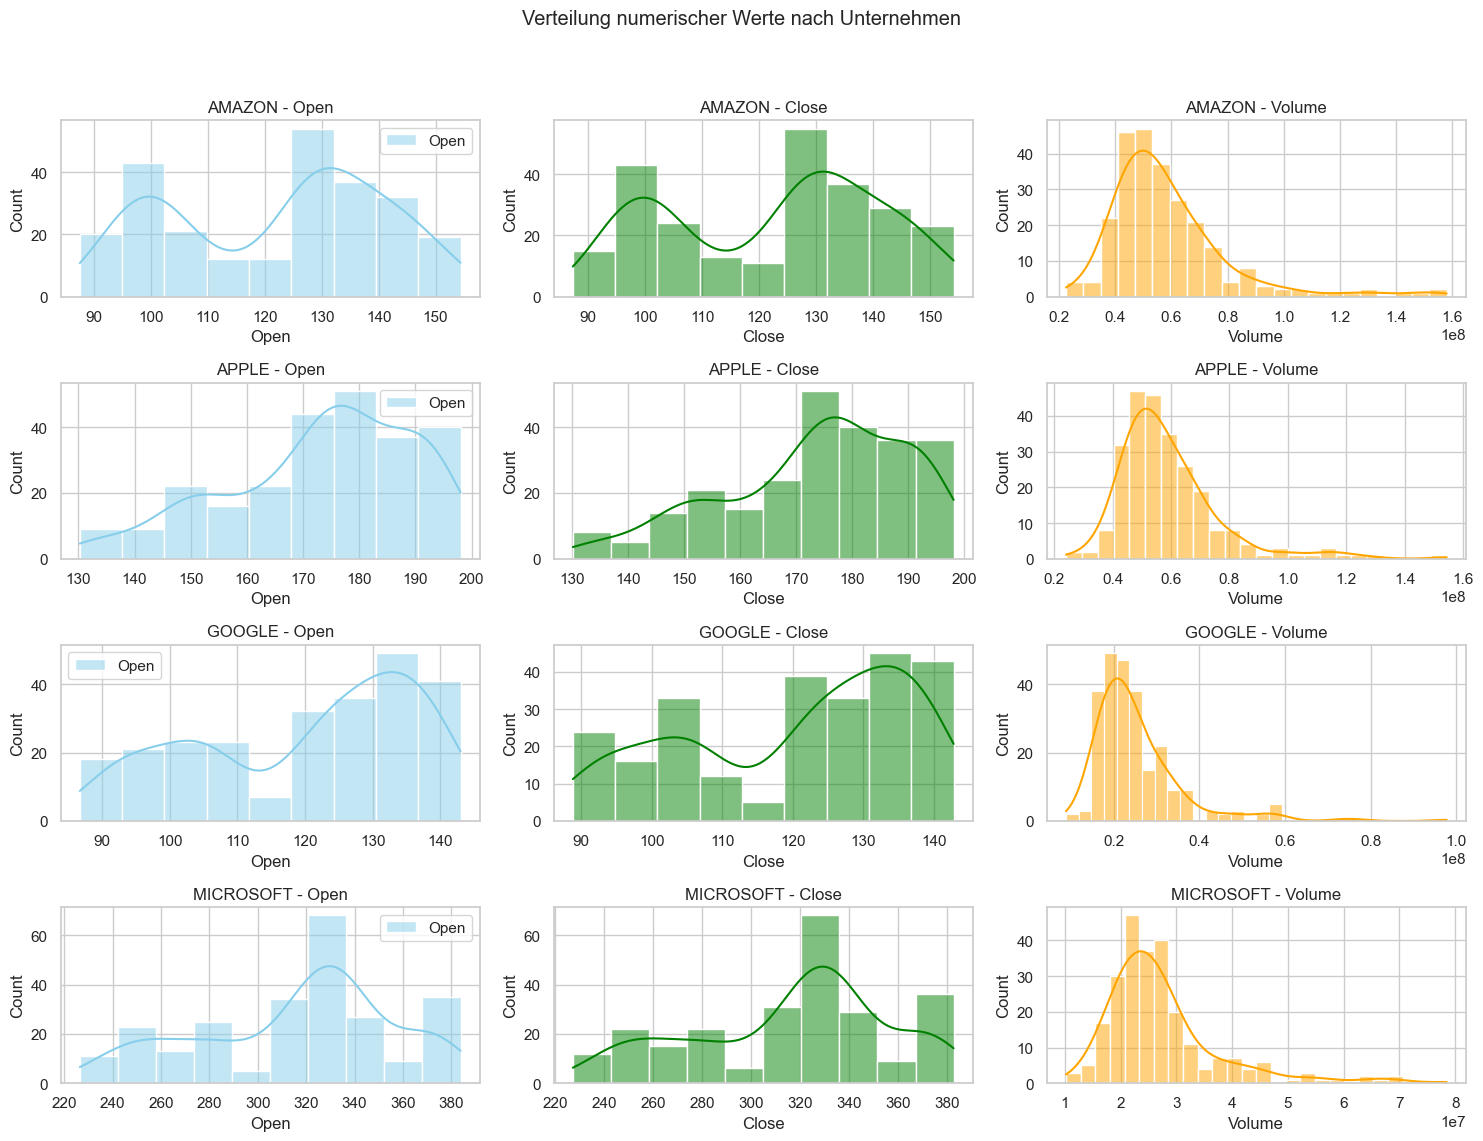

In [198]:
# Alle Warnungen ausschalten
warnings.filterwarnings("ignore")

# Setzen des Seaborn-Stils
sns.set(style="whitegrid")

# Liste der Unternehmen
companies = ['AMAZON', 'APPLE', 'GOOGLE', 'MICROSOFT']

# Erstellen von Subplots für jede numerische Spalte
fig, axes = plt.subplots(nrows=len(companies), ncols=3, figsize=(15, 12))  # Erhöhe die Höhe der Abbildung
fig.suptitle('Verteilung numerischer Werte nach Unternehmen')

# Histogramme für 'Open', 'Close' und 'Volume' für jedes Unternehmen plotten
for i, company in enumerate(companies):
    subset = df[df['company_name'] == company]
    
    # 'Open'
    sns.histplot(subset['Open'], kde=True, ax=axes[i, 0], color='skyblue', label='Open')
    
    # 'Close'
    sns.histplot(subset['Close'], kde=True, ax=axes[i, 1], color='green', label='Close')
    
    # 'Volume'
    sns.histplot(subset['Volume'], kde=True, ax=axes[i, 2], color='orange', label='Volume')

    # Titel für jeden Subplot setzen
    axes[i, 0].set_title(f'{company} - Open')
    axes[i, 1].set_title(f'{company} - Close')
    axes[i, 2].set_title(f'{company} - Volume')

    # Legende nur zum ersten Subplot hinzufügen
    axes[i, 0].legend()

# Anordnung der Abbildung anpassen
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Ursprüngliche Warnungseinstellungen wiederherstellen, um andere Warnungen nicht zu unterdrücken
warnings.resetwarnings()

### Boxplotanalyse fuer Open, Close und Volume

Die Boxplot-Analyse für die 'Open', 'Close' und 'Volume'-Spalten ermöglicht einen schnellen Überblick über die Verteilung der Finanzdaten und hilft, Unterschiede zwischen den Tech-Unternehmen sowie potenzielle Ausreißer zu identifizieren. Besonders die Visualisierung des Handelsvolumens in Bezug auf Kursbewegungen bietet wichtige Einblicke. Insgesamt unterstützt die Boxplot-Analyse eine effiziente Interpretation der Finanzdaten.

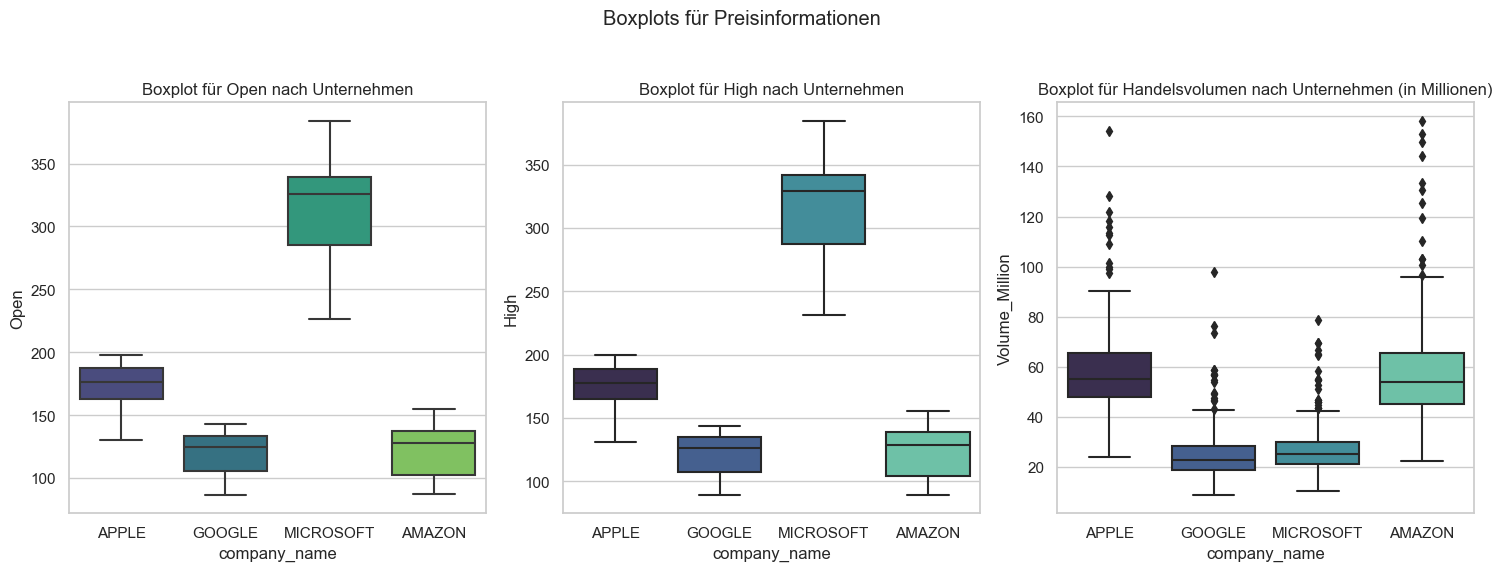

In [199]:
# Turn off all warnings
warnings.filterwarnings("ignore")

# Skaliere das Handelsvolumen in Millionen
df['Volume_Million'] = df['Volume'] / 1000000

# Set the Seaborn style
sns.set(style="whitegrid")

# Erstelle einen Boxplot für jede Preisspalte
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
fig.suptitle('Boxplots für Preisinformationen')

# Boxplot für Open, High, Low und Close
sns.boxplot(x='company_name', y='Open', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Boxplot für Open nach Unternehmen')

sns.boxplot(x='company_name', y='High', data=df, ax=axes[1], palette='mako')
axes[1].set_title('Boxplot für High nach Unternehmen')

# Boxplot für das Handelsvolumen in Millionen
sns.boxplot(x='company_name', y='Volume_Million', data=df, ax=axes[2], palette='mako')
axes[2].set_title('Boxplot für Handelsvolumen nach Unternehmen (in Millionen)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Stelle die ursprünglichen Warnungseinstellungen wieder her, um andere Warnungen nicht zu unterdrücken
warnings.resetwarnings()


### Handelsvolumen Analyse
Die erste Analyse, ein Violinplot nach Monat, ermöglicht die Identifikation saisonaler Muster im Handelsvolumen, was für die Planung von Handelsstrategien wichtig ist.

Die zweite Analyse vertieft die Untersuchung, indem sie das Handelsvolumen nach Quartal und differenziert nach Unternehmen betrachtet. Dies ermöglicht einen zeitlichen und branchenspezifischen Vergleich für fundierte Investitionsentscheidungen.


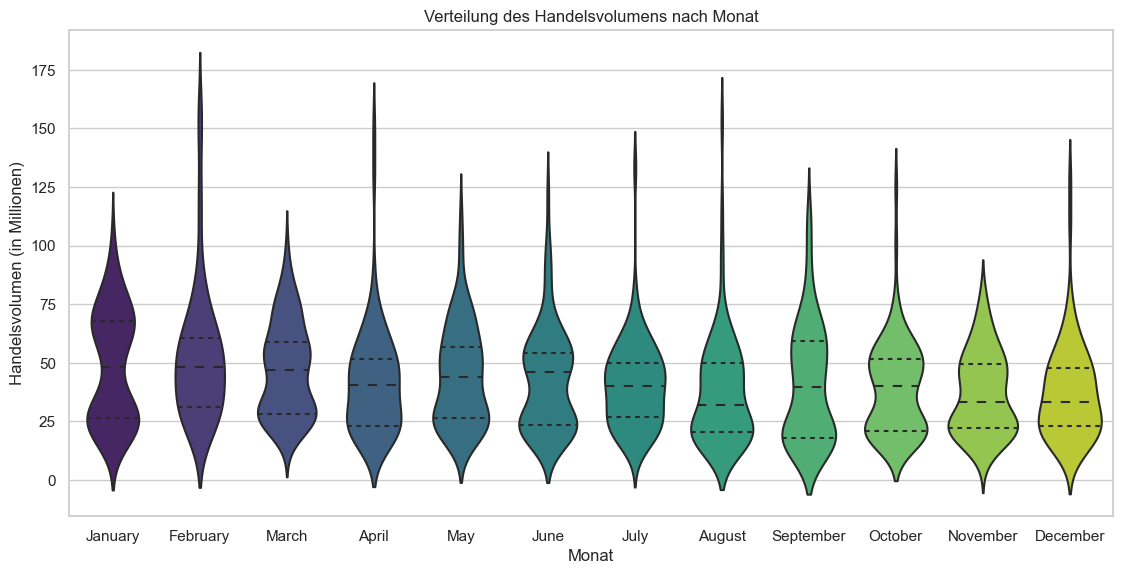

In [200]:
# Turn off all warnings
warnings.filterwarnings("ignore")

# Extrahiere den Monat aus dem Datumsindex
df['Month'] = df.index.month_name()

# Set the Seaborn style
sns.set(style="whitegrid")

# Erstelle ein Violinplot für das Handelsvolumen nach Monat
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='Volume_Million', data=df, palette='viridis', inner='quartile')

# Setze den Titel und die Achsentitel
plt.title('Verteilung des Handelsvolumens nach Monat')
plt.xlabel('Monat')
plt.ylabel('Handelsvolumen (in Millionen)')

# Zeige das Diagramm an
plt.show()

# Stelle die ursprünglichen Warnungseinstellungen wieder her, um andere Warnungen nicht zu unterdrücken
warnings.resetwarnings()

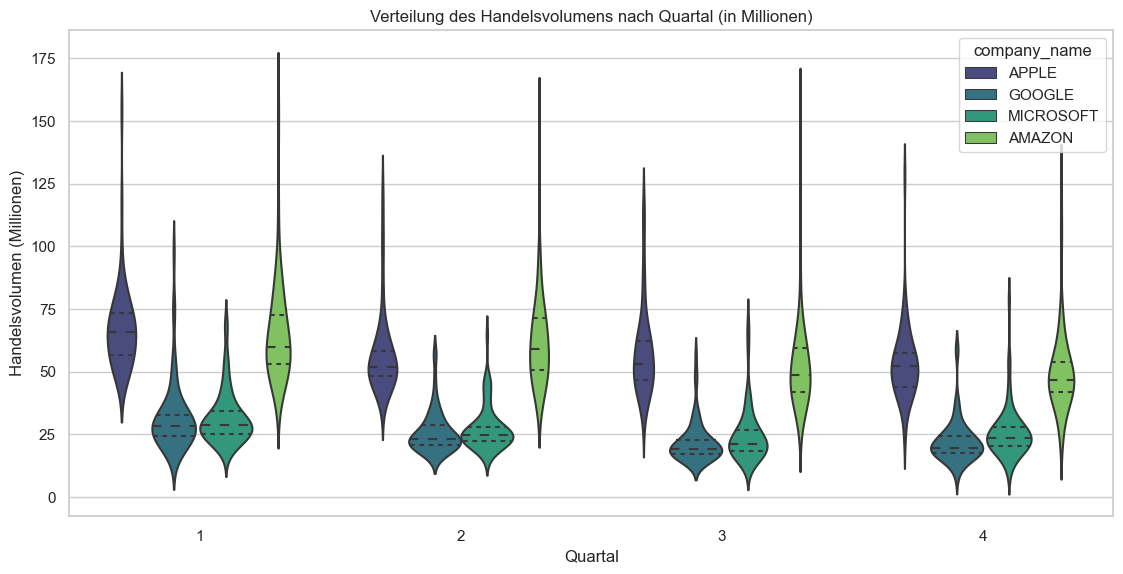

In [201]:
# Turn off all warnings
warnings.filterwarnings("ignore")

# Extrahiere das Quartal aus dem Datumsindex
df['Quarter'] = df.index.quarter

# Setze den Stil von Seaborn für eine ästhetische Darstellung
sns.set(style="whitegrid")

# Erstelle ein Violinplot für das Handelsvolumen nach Quartal, differenziert nach Unternehmen
plt.figure(figsize=(12, 6))
sns.violinplot(x='Quarter', y='Volume_Million', hue='company_name', data=df, palette='viridis', inner='quartile')

# Setze den Titel und die Achsentitel
plt.title('Verteilung des Handelsvolumens nach Quartal (in Millionen)')
plt.xlabel('Quartal')
plt.ylabel('Handelsvolumen (Millionen)')

# Zeige das Diagramm an
plt.show()

# Stelle die ursprünglichen Warnungseinstellungen wieder her, um andere Warnungen nicht zu unterdrücken
warnings.resetwarnings()

Diese Grafik ist ein Violin-Diagramm, das die Verteilung des Handelsvolumens nach Quartal für verschiedene Unternehmen darstellt. Jeder Violin repräsentiert ein Quartal für ein bestimmtes Unternehmen.

Innerhalb jedes Violins sehen wir wieder das Interquartilsbereich (IQR) und den Median, der als gestrichelte Linie markiert ist. Die vertikalen Linien (Whiskers) zeigen die gesamte Bandbreite der Daten, einschließlich möglicher Ausreißer.

## 1.0 Wie hat sich der Preis der Aktie im Laufe der Zeit verändert?

In diesem Abschnitt zeigen wir, wie die Abfrage von Bestandsinformationen mit Pandas gehandhabt wird und wie die grundlegenden Attribute eines Bestands analysiert werden können.|


### 1.1 Schlusskurs (Closing Price)
Der Schlusskurs ist der letzte Preis, zu dem die Aktie während des regulären Handelstages gehandelt wird. Dieser Kurs in der Regel die Standard-Benchmark, die von Anlegern zur Verfolgung ihrer Performance über die Zeit verwendet wird.

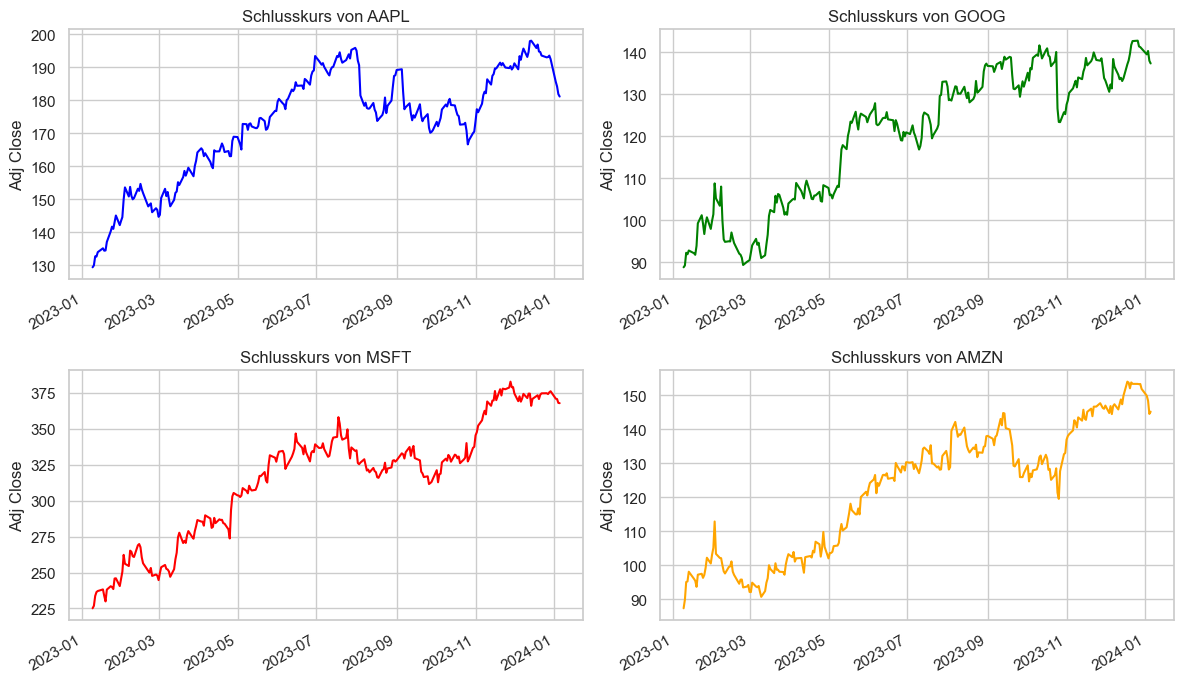

In [202]:
# Historische Schlusskurse
plt.figure(figsize=(12, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)  # Anpassung des Layouts für zusätzlichen Raum oben und unten

colors = ['blue', 'green', 'red', 'orange']  # Definition der Farben für jedes Unternehmen

# Iteration über jedes Unternehmen für separate Plots
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color=colors[i-1])  # Verwendung der entsprechenden Farbe für jedes Unternehmen
    plt.ylabel('Adj Close')  # Beschriftung der Y-Achse mit 'Adj Close'
    plt.xlabel(None)  # X-Achsenbeschriftungen ausschalten
    plt.title(f"Schlusskurs von {tech_list[i - 1]}")  # Titel für jeden Plot setzen
    
plt.tight_layout()  # Optimierung der Anordnung der Plots für eine bessere Lesbarkeit

### 1.2 Candlestick Diagramme (Stock Price)

Das Candlestick-Chart wurde im Notebook eingefügt, um Finanzdaten anschaulich darzustellen. Diese Visualisierung ermöglicht eine prägnante Darstellung der Preisentwicklung, erleichtert die schnelle Erkennung von Trends und Marktstimmungen und bietet durch Interaktivität, besonders in Verbindung mit Plotly, eine effiziente Möglichkeit, spezifische Zeiträume zu analysieren.

**Warum Plotly für Candlestick-Charts?**

Plotly wird aufgrund seiner Anpassbarkeit und Interaktivität gewählt. Die `Candlestick`-Funktion ermöglicht die einfache Darstellung von Aktienkursbewegungen, während der `seaborn`-Template-Stil dem Chart ein ästhetisches Aussehen verleiht.


In [203]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Eindeutige Firmennamen abrufen
companies = df['company_name'].unique()

# Erstellen einer Figur mit 2x2 Subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=[f'Candlestick-Chart - {company}' for company in companies], vertical_spacing= 0.3)

# Zähler für die Platzierung der Subplots
subplot_counter = 0

# Candlestick-Chart je Firma
for company in companies:
    company_df = df[df['company_name'] == company]
    row = subplot_counter // 2 + 1  # Berechnung der richtigen Reihe
    col = subplot_counter % 2 + 1   # Berechnung der richtigen Spalte
    
    # Hinzufügen eines Candlestick-Charts zu einem Subplot
    fig.add_trace(
        go.Candlestick(x=company_df.index,
                       open=company_df['Open'],
                       high=company_df['High'],
                       low=company_df['Low'],
                       close=company_df['Close']),
        row=row,  # Reihe des Subplots
        col=col)  # Spalte des Subplots

    # Erhöhen des Subplot-Zählers
    subplot_counter += 1 # damit wir die richtige Position für den nächsten Subplot haben

# Aktualisierung des Layouts der gesamten Figur
fig.update_layout(title='Candlestick-Charts für verschiedene Unternehmen',
                  xaxis_title='Datum',
                  yaxis_title='Aktienkurs',
                  template='seaborn',
                  showlegend=False,
                  height=1000,  # Höhe angepasst, um alle Subplots zu berücksichtigen
                  width=1800)  # Breite angepasst, um alle Subplots zu berücksichtigen

fig.show()


### 1.2 Handelsvolumen (Volume)
Das Volumen ist die Menge eines Vermögenswerts oder Wertpapiers, die über einen bestimmten Zeitraum den Besitzer wechselt. Beispielsweise würde das Handelsvolumen einer Aktie auf die Anzahl der Aktien des Wertpapiers verweisen, die zwischen der täglichen Eröffnung und Schließung gehandelt werden. 

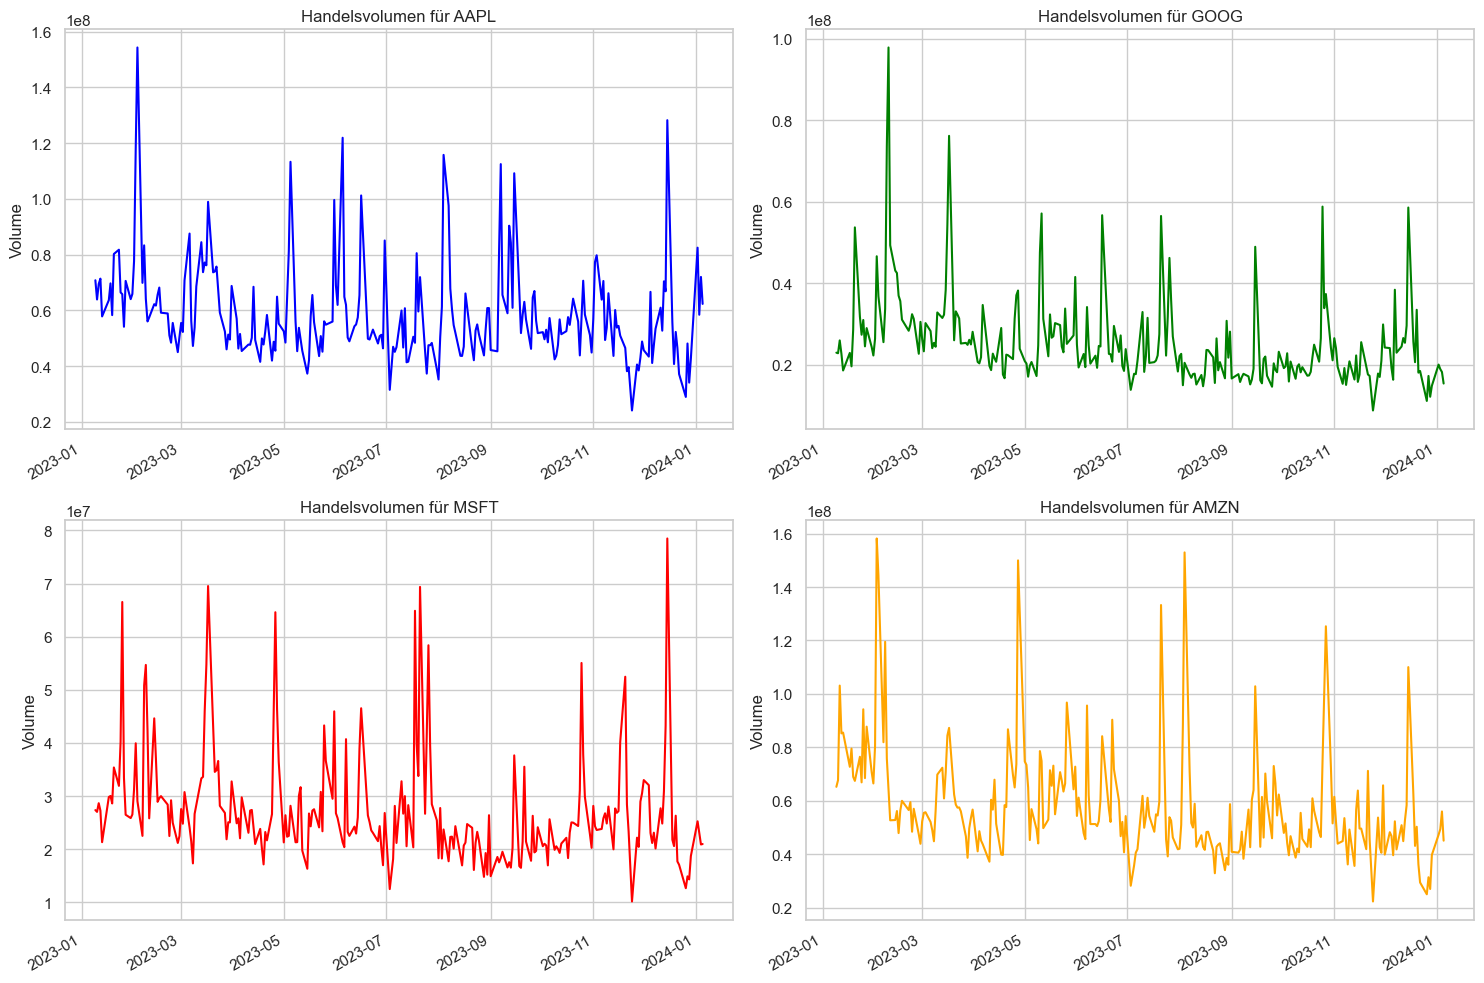

In [204]:
# Plot des Handelsvolumens
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)  # Anpassung des Layouts für zusätzlichen Raum oben und unten

colors = ['blue', 'green', 'red', 'orange']  # Definition der Farben für jedes Unternehmen

# Iteration über jedes Unternehmen für separate Plots
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color=colors[i-1])  # Plot des Handelsvolumens mit der entsprechenden Farbe für jedes Unternehmen
    plt.ylabel('Volume')  # Beschriftung der Y-Achse mit 'Volume'
    plt.xlabel(None)  # X-Achsenbeschriftungen ausschalten
    plt.title(f"Handelsvolumen für {tech_list[i - 1]}")  # Titel für jeden Plot setzen
    
plt.tight_layout()  # Optimierung der Anordnung der Plots für eine bessere Lesbarkeit


## 2.0 Wie war die Tagesrendite der Aktie?

Nachdem wir nun einige grundlegende Analysen durchgeführt haben, wollen wir etwas tiefer eintauchen. Wir werden nun das Risiko der Aktie analysieren. Um dies zu tun, müssen wir uns die täglichen Veränderungen der Aktie genauer ansehen. Hierfür verwenden wir Pandas, um die täglichen Renditen für die Apple-Aktie abzurufen.

Die Funktion `.pct_change()` gehört zur Pandas-Bibliothek und wird auf Zeitreihen angewendet. Sie berechnet die prozentuale Veränderung zwischen aufeinanderfolgenden Elementen einer Zeitreihe. Im Kontext von Aktienkursen wird sie verwendet, um die tägliche Rendite in Prozent zu berechnen, was die prozentuale Veränderung von einem Tag zum nächsten darstellt.


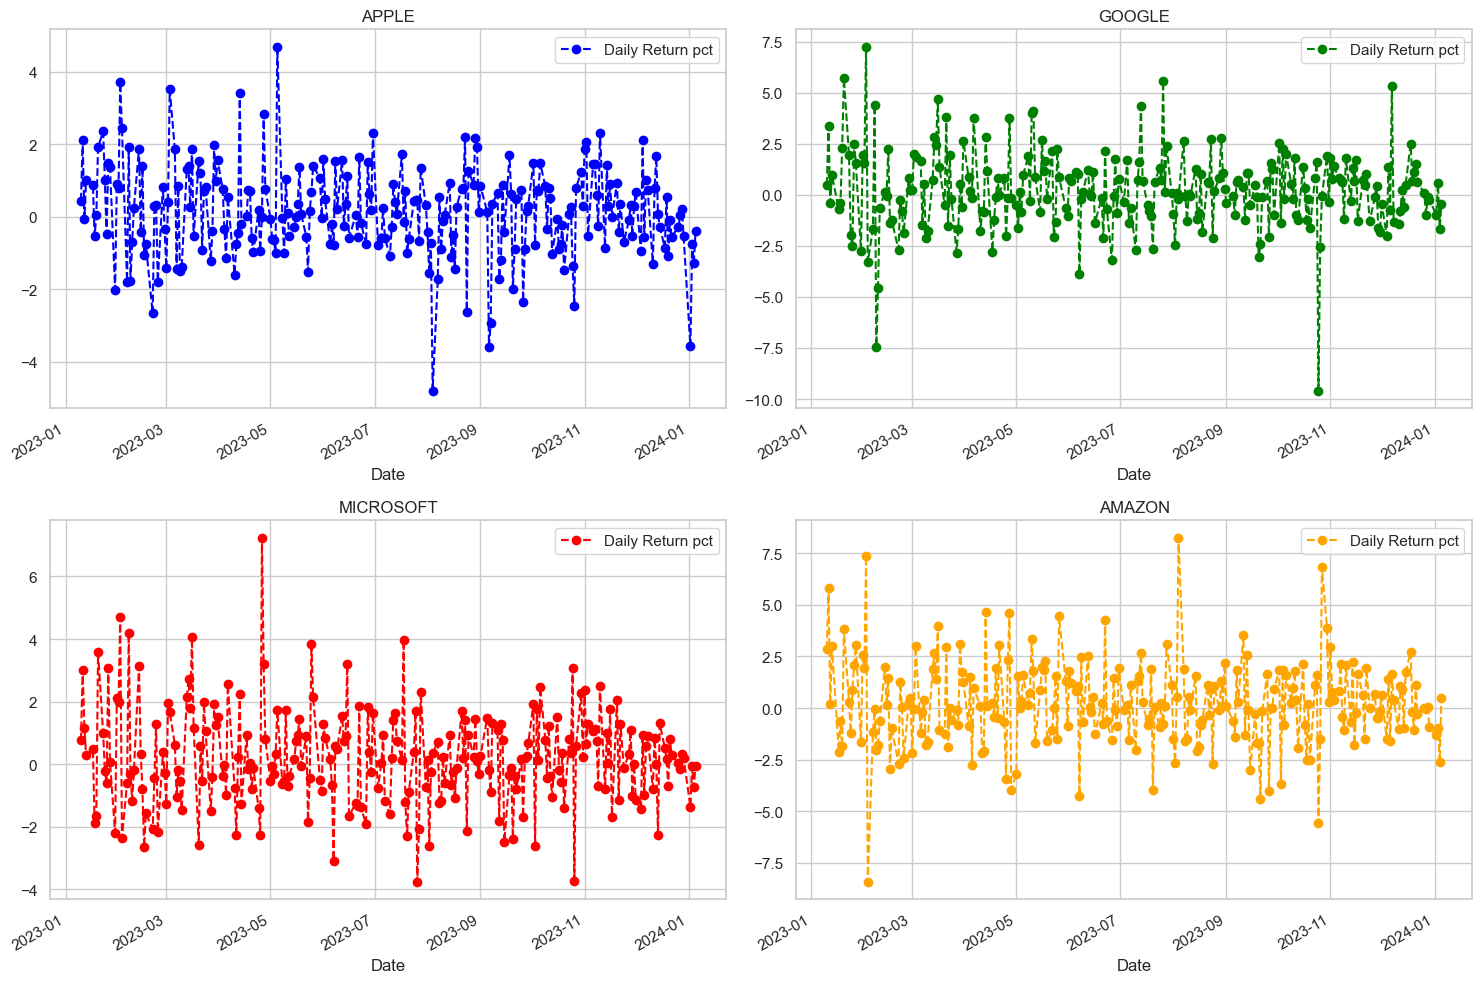

In [205]:
colors = ['blue', 'green', 'red', 'orange']  # Definition der Farben für jedes Unternehmen

for company, color in zip(company_list, colors):
    company['Daily Return'] = company['Adj Close'].pct_change()  # Berechnung der täglichen Rendite
    company['Daily Return pct'] = company['Adj Close'].pct_change() * 100  # Berechnung der täglichen Rendite in Prozent

# Dann plotten wir die tägliche Rendite
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plotten der täglichen Rendite in Prozent für jedes Unternehmen mit den definierten Farben
AAPL['Daily Return pct'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o', color=colors[0])  # APPLE
axes[0,0].set_title('APPLE')

GOOG['Daily Return pct'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', color=colors[1])  # GOOGLE
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return pct'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', color=colors[2])  # MICROSOFT
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return pct'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', color=colors[3])  # AMAZON
axes[1,1].set_title('AMAZON')

fig.tight_layout()  # Optimierung der Anordnung der Plots für eine bessere Lesbarkeit


### 2.1 Verteilung der Tagesrendite
Um die Verteilung der Renditen besser zu verstehen, erstellen wir Histogramme. Hier lassen sich bereits erste Anhaltspunkte dafür finden, ob die Aktienkurse normalverteilt sind.

Die Funktion `.norm.pdf()` gehört zur SciPy-Bibliothek, die Werkzeuge für wissenschaftliches Rechnen in Python bereitstellt. Speziell handelt es sich um die Wahrscheinlichkeitsdichtefunktion (PDF) der Normalverteilung (Gaußsche Verteilung). Die Normalverteilung ist eine der grundlegenden statistischen Verteilungen und wird oft in der Finanzanalyse verwendet. Die Funktion `.norm.pdf()` ermöglicht es, die Wahrscheinlichkeitsdichte für verschiedene Werte in einer Normalverteilung zu berechnen und ist somit hilfreich für statistische Analysen und Visualisierungen.


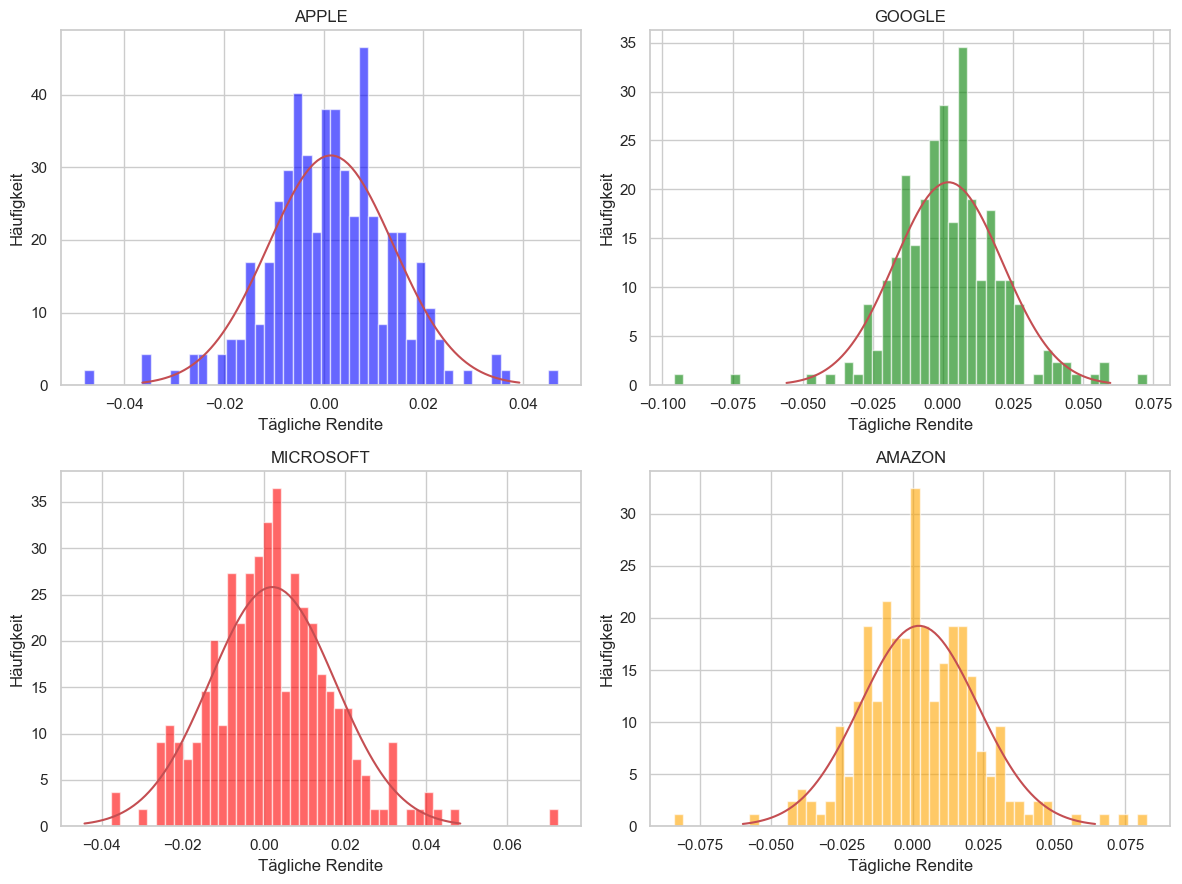

In [206]:
plt.figure(figsize=(12, 9))

# Iteration über jedes Unternehmen für separate Plots mit den definierten Farben
for i, (company, color) in enumerate(zip(company_list, colors), 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, density=True, alpha=0.6, color=color)
    plt.xlabel('Tägliche Rendite')
    plt.ylabel('Häufigkeit')
    plt.title(f'{company_name[i - 1]}')

    # Berechne Mittelwert und Standardabweichung
    mu = company['Daily Return'].mean()
    sigma = company['Daily Return'].std()

    # X-Werte für die Normalverteilung
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

    # Plotte die Normalverteilung
    plt.plot(x, stats.norm.pdf(x, mu, sigma), color='r')



plt.tight_layout()

### 2.2 Sind die Täglichen Renditen normalverteilt?

Um zu untersuchen, ob die täglichen Renditen einer Normalverteilung folgen, werden wir verschiedene statistische Methoden und Visualisierungen anwenden.

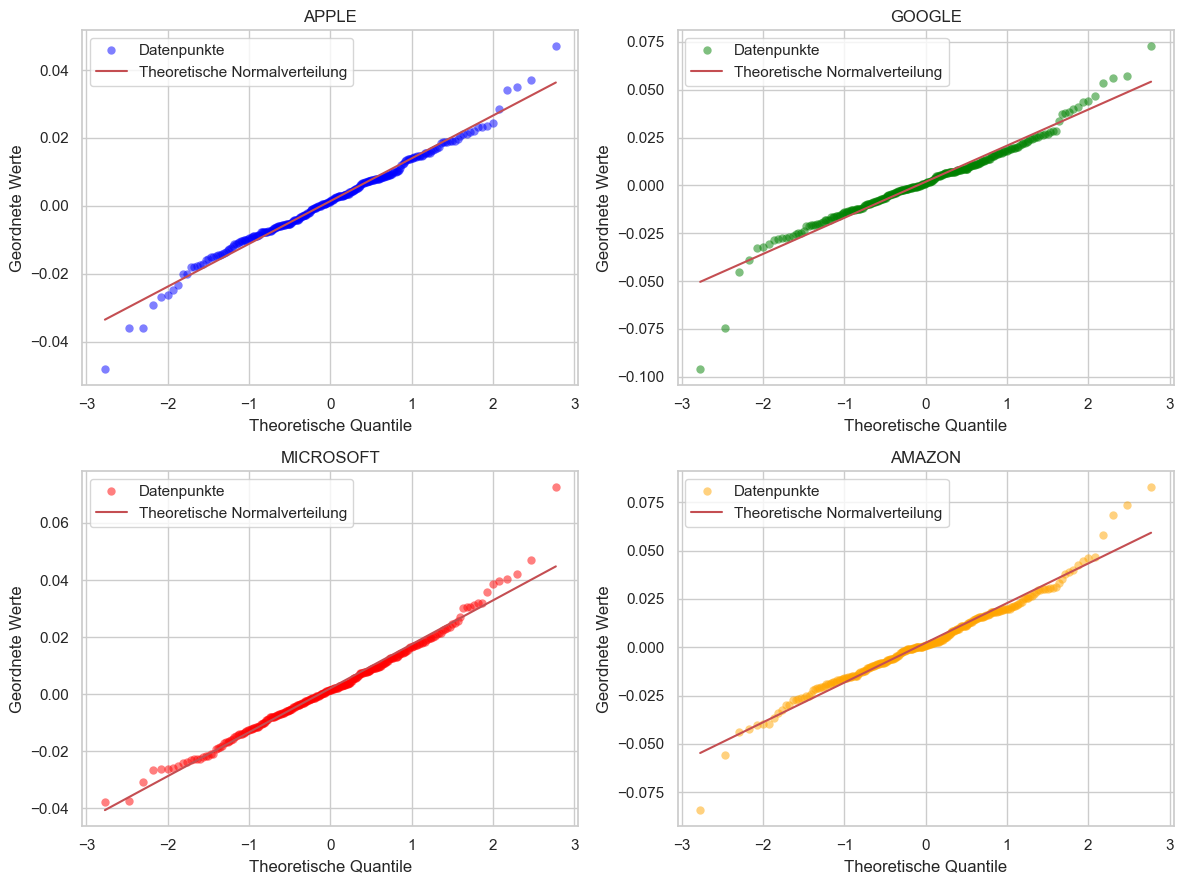

In [207]:
# QQ-Plot, welches die Abweichung der Rendite von der Normalverteilung zeigt
plt.figure(figsize=(12, 9))

# Iteration über jedes Unternehmen für separate QQ-Plots mit den definierten Farben
for i, (company, color) in enumerate(zip(company_list, colors), 1):
    plt.subplot(2, 2, i)
    
    # QQ-Plot generieren
    (osm, osr), (slope, intercept, r) = stats.probplot(company['Daily Return'].dropna(), plot=None)
    
    # Darstellung der Datenpunkte
    plt.plot(osm, osr, 'o', label='Datenpunkte', color=color, alpha=0.5, markeredgecolor='none')  # 'o' ist für Punktmarker
    
    # Angepasste Linie
    plt.plot(osm, slope*osm + intercept, 'r', label='Theoretische Normalverteilung')

    # Plot anpassen
    plt.xlabel('Theoretische Quantile')
    plt.ylabel('Geordnete Werte')
    plt.title(f'{company_name[i - 1]}')
    plt.legend()  # Legende hinzufügen

plt.tight_layout()

Ein Q-Q-Diagramm ist ein Streudiagramm, das die quantilen der Stichprobenverteilung gegen die quantilen einer theoretischen Verteilung, in diesem Fall einer Normalverteilung, aufträgt. Dies wird verwendet, um zu beurteilen, ob die Daten der Normalverteilung folgen.

Die Aktienrenditen scheinen um den Mittelwert herum ungefähr einer Normalverteilung zu folgen, zeigen aber gerade in den Randbereichen der Verteilung größere Abweichungen.

Genauer können wir das mit einem Test auf Normalverteilung bestimmen:

In [208]:
# D'Agostino and Pearson's Test auf Normalität
for i, company in enumerate(company_list, 1):
    print(company_name[i - 1])
    
    # Normalitätstest durchführen
    result = stats.normaltest(company['Daily Return'].dropna())
    
    # Überprüfen, ob die Nullhypothese abgelehnt wurde
    if result.pvalue < 0.05:
        print("Nullhypothese abgelehnt: Die täglichen Renditen sind nicht normalverteilt.")
    else:
        print("Nullhypothese angenommen: Die täglichen Renditen sind normalverteilt.")
    
    # Ausgabe von Teststatistik und p-Wert
    print("Teststatistik:", result.statistic)
    print("p-Wert:", result.pvalue)
    print('\n')


APPLE
Nullhypothese abgelehnt: Die täglichen Renditen sind nicht normalverteilt.
Teststatistik: 10.241404171430702
p-Wert: 0.005971828687215724


GOOGLE
Nullhypothese abgelehnt: Die täglichen Renditen sind nicht normalverteilt.
Teststatistik: 30.625274625539806
p-Wert: 2.2377218972129667e-07


MICROSOFT
Nullhypothese abgelehnt: Die täglichen Renditen sind nicht normalverteilt.
Teststatistik: 20.5869364038023
p-Wert: 3.385349880526819e-05


AMAZON
Nullhypothese abgelehnt: Die täglichen Renditen sind nicht normalverteilt.
Teststatistik: 17.270794649689098
p-Wert: 0.00017770293171151915




Tatsächlich ist keine der Aktien normalverteilt.

## 3.0 Wie war der gleitende Durchschnitt der verschiedenen Aktien?

Die Visualisierungen für den Schlusskurs und das täglich gehandelte Volumen haben wir bereits analysiert. Deshalb wollen wir jetzt den gleitenden Durchschnitt für die Aktien uns naeher ansehen.

Der gleitende Durchschnitt (MA) ist ein einfaches technisches Analysewerkzeug, das Preisdaten glättet, indem es einen ständig aktualisierten Durchschnittspreis erstellt. Der Durchschnitt wird über einen bestimmten Zeitraum ermittelt, wie z.B. 10 Tage, 20 Minuten oder 30 Wochen.


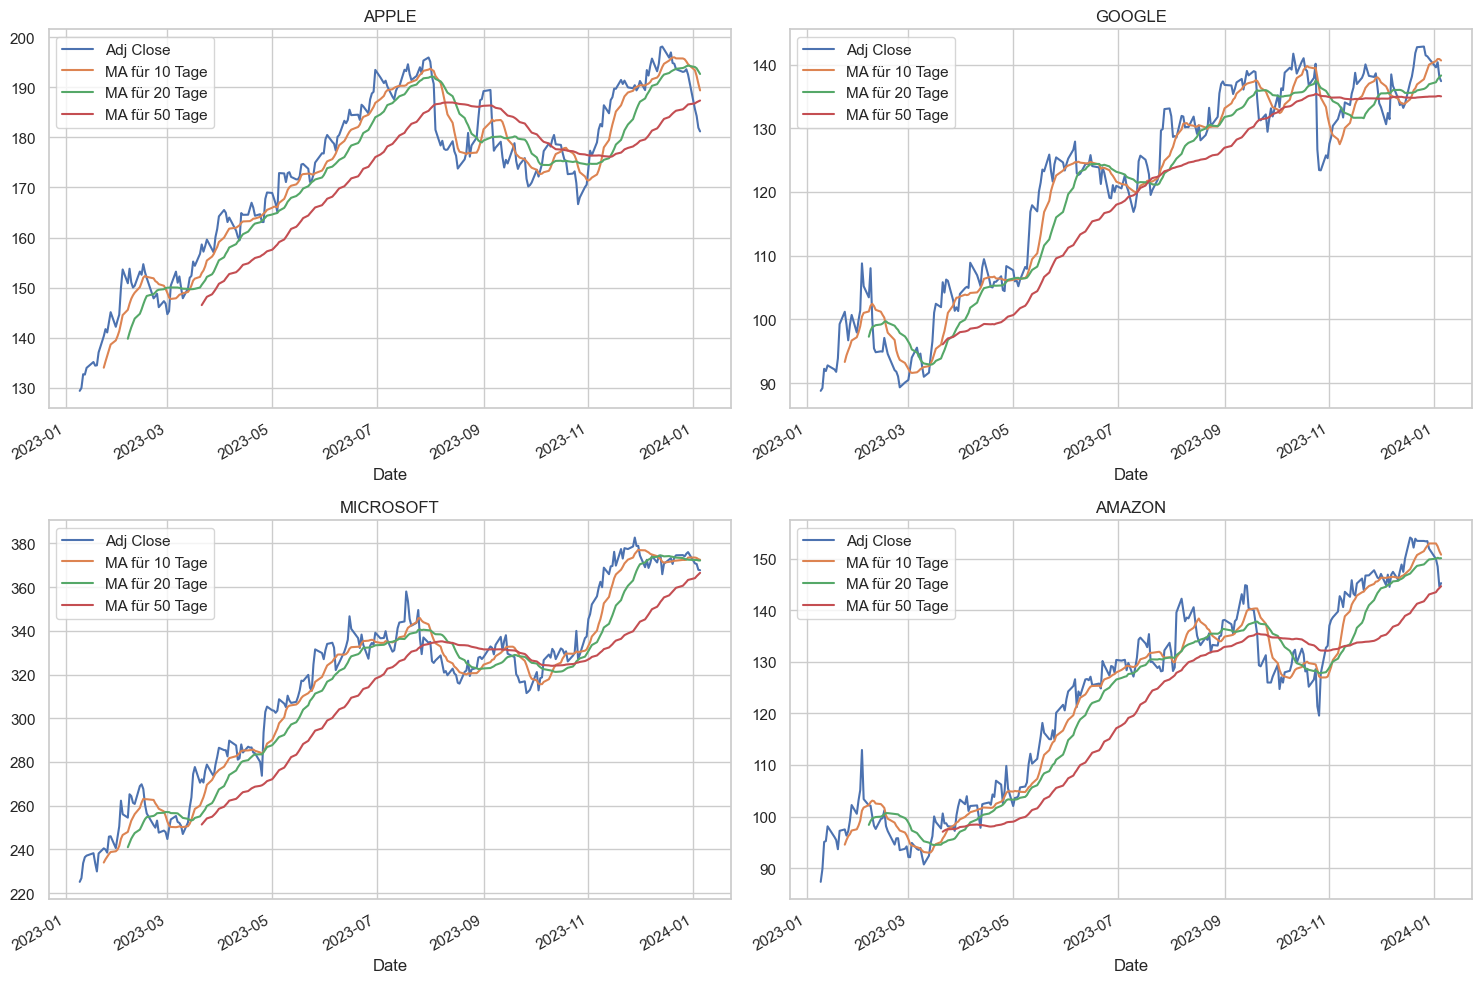

In [209]:
# Liste der Tage für die gleitenden Durchschnitte
ma_day = [10, 20, 50]

# Berechnung der gleitenden Durchschnitte (Moving Averages) für verschiedene Zeiträume
for ma in ma_day:
    for company in company_list:
        column_name = f"MA für {ma} Tage"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

# Plotten der Kursdaten und gleitenden Durchschnitte für jedes Unternehmen
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plotten der Daten für APPLE
AAPL[['Adj Close', 'MA für 10 Tage', 'MA für 20 Tage', 'MA für 50 Tage']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

# Plotten der Daten für GOOGLE
GOOG[['Adj Close', 'MA für 10 Tage', 'MA für 20 Tage', 'MA für 50 Tage']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

# Plotten der Daten für MICROSOFT
MSFT[['Adj Close', 'MA für 10 Tage', 'MA für 20 Tage', 'MA für 50 Tage']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

# Plotten der Daten für AMAZON
AMZN[['Adj Close', 'MA für 10 Tage', 'MA für 20 Tage', 'MA für 50 Tage']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


## 4.0 Wie war die Korrelation zwischen verschiedenen Aktien?
Die Korrelation ist eine Statistik, die das Ausmaß misst, in dem zwei Variablen in Beziehung zueinander stehen. Sie hat einen Wert, der zwischen -1,0 und +1,0 liegt. Die Korrelation misst die Assoziation, zeigt aber nicht, ob x y verursacht oder umgekehrt - oder ob die Assoziation durch einen dritten Faktor verursacht wird.

Hierfür erstellen wir zunächst ein neues Dataframe, welches nur die täglichen Renditen für alle vier Tech-Aktien enthält.

In [210]:
# Turn off all warnings
warnings.filterwarnings("ignore")

# Erfassung aller Schlusskurse für die Liste der Tech-Aktien in einem DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Erstellung eines neuen tech returns DataFrame (tägliche Rendite)
tech_rets = closing_df.pct_change()[1:]
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


AAPL      AMZN      GOOG      MSFT
Date                                              
2023-01-10  0.004456  0.028732  0.004955  0.007617
2023-01-11  0.021112  0.058084  0.033841  0.030238
2023-01-12 -0.000599  0.001893 -0.003794  0.011621
2023-01-13  0.010119  0.029915  0.009683  0.003019
2023-01-17  0.008757 -0.021097 -0.006897  0.004682

### 4.1 Korrelation zwischen den täglichen Renditen ueber den gesamten Zeitraum
Nun können wir die tägliche prozentuale Rendite der Aktien vergleichen, um zu prüfen, inwieweit sie miteinander korrelieren. Betrachten wir zunächst ein Scatterplot einer Aktie im Vergleich zu sich selbst.

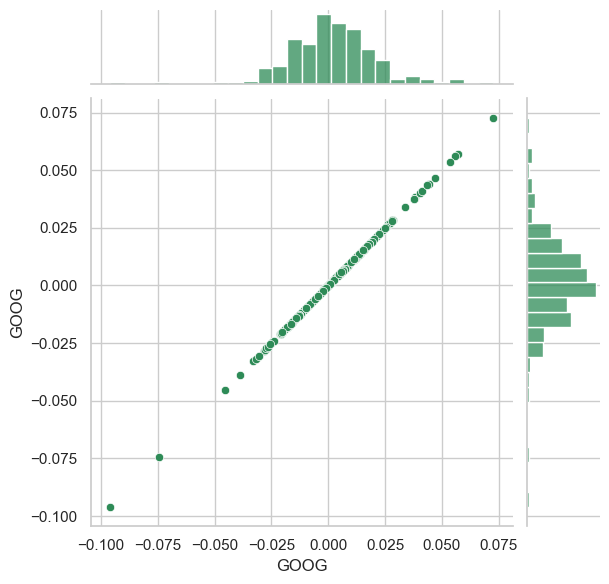

In [211]:
# Ein Vergleich von Google mit sich selbst zeigt eine perfekte lineare Beziehung
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

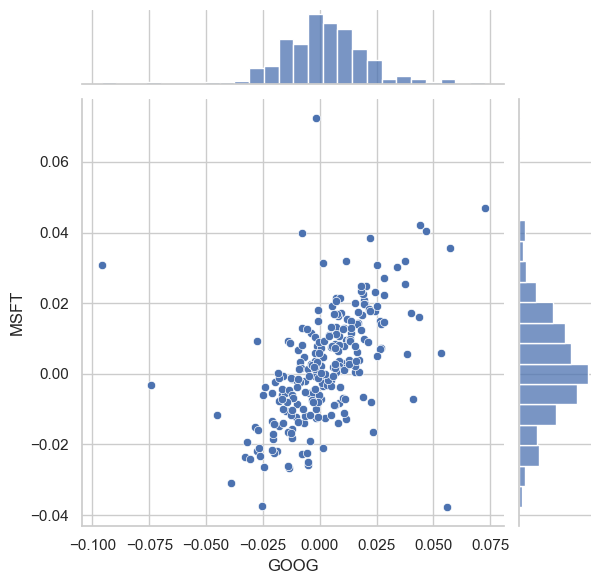

In [212]:
# Google vs Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Wir sehen also, dass, wenn zwei Aktien stark miteinander korreliert sind, eine lineare Beziehung zwischen ihren täglichen Renditewerten erkennbar sein sollte. 

#### Analyse mit Pairplot 

Mit Seaborn und Pandas ist es sehr einfach, diese Vergleichsanalyse für jede mögliche Kombination von Aktien in unserer Tickerliste für Technologieaktien zu wiederholen. Wir können sns.pairplot() verwenden, um diese Darstellung automatisch zu erstellen.

Die `sns.pairplot()` Funktion in Seaborn erstellt ein Raster von Scatterplots für jede Paarung von numerischen Variablen in einem Pandas-Dataframe. Histogramme auf der Hauptdiagonalen zeigen die Verteilung jeder einzelnen Variable. Dies ermöglicht eine schnelle visuelle Analyse von Beziehungen und Muster im Datensatz.

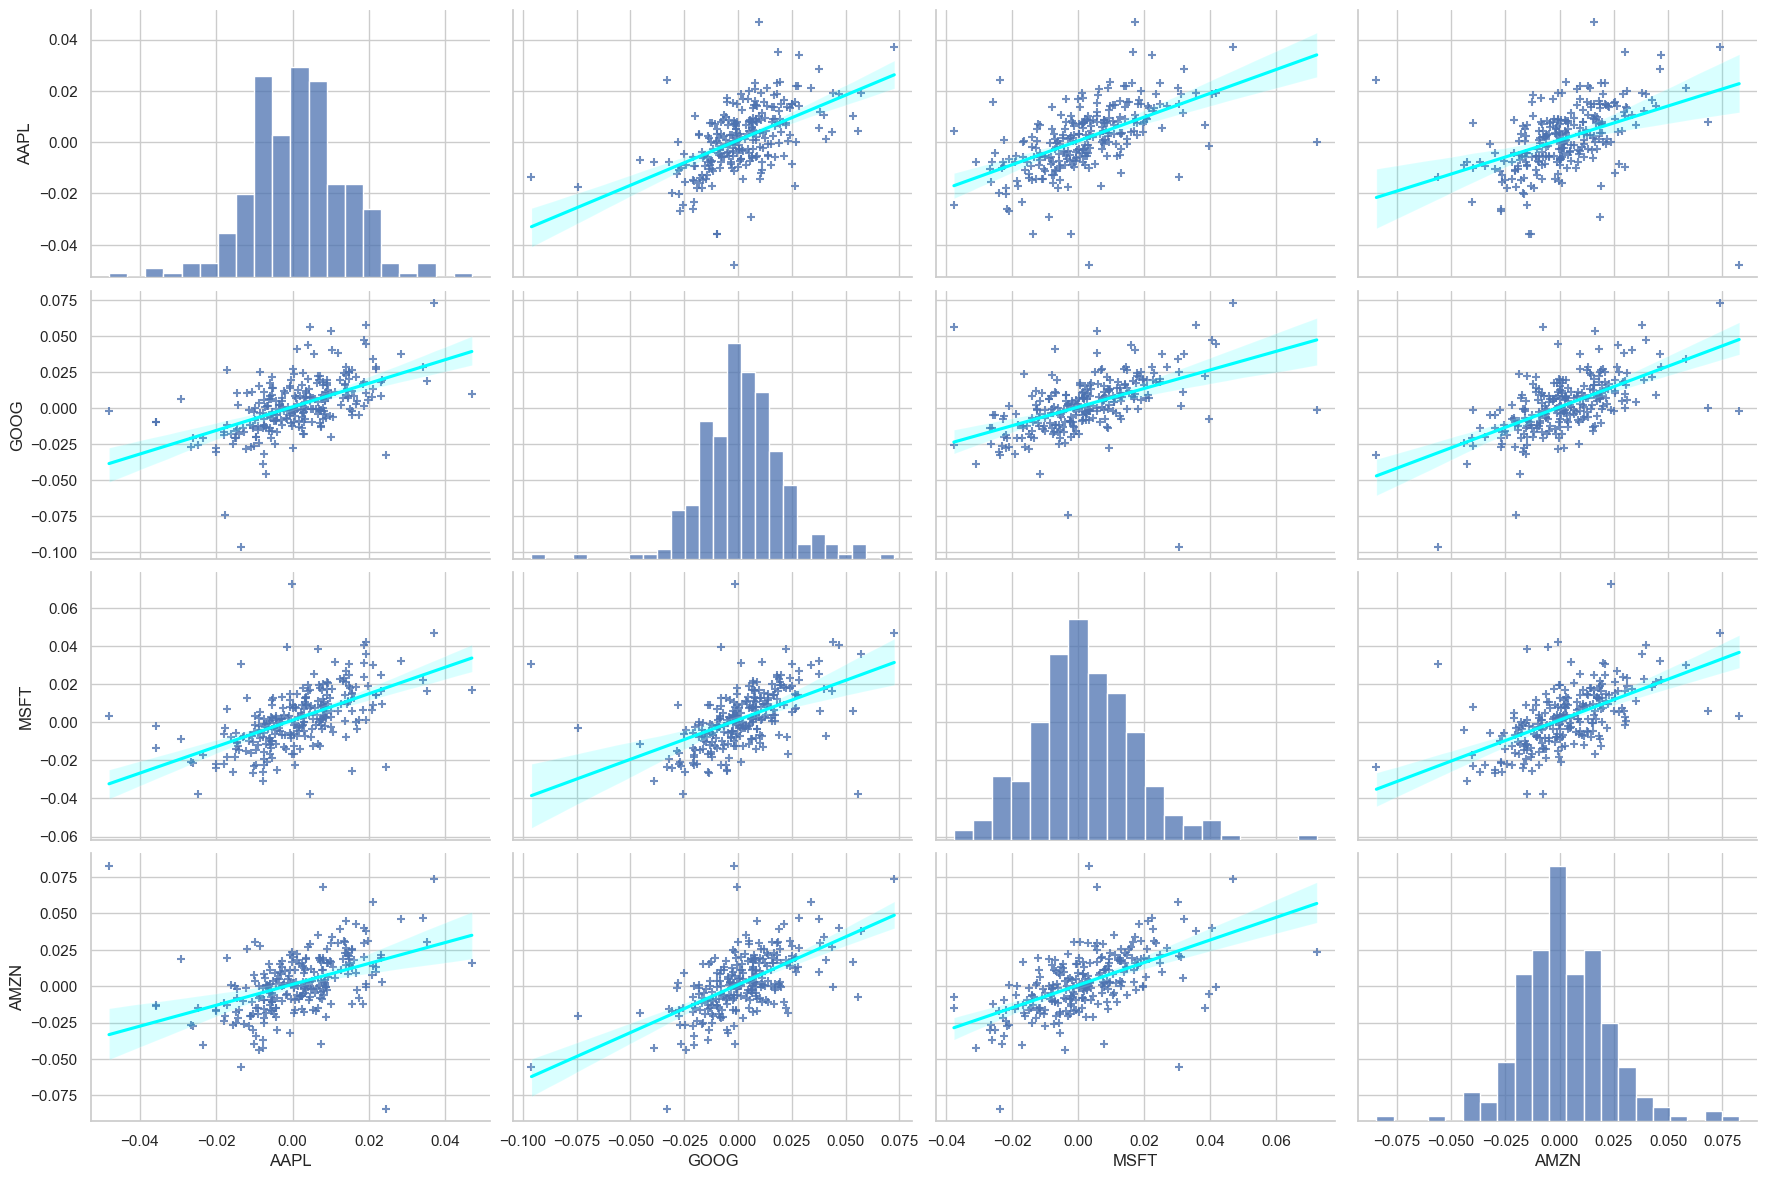

In [213]:
# Wir können  pairplot auf unserem DataFrame aufrufen, um eine automatische visuelle Analyse durchzuführen. 
sns.pairplot(tech_rets, kind='reg', plot_kws={'line_kws':{'color':'cyan'}}, height=3, aspect=1.5, dropna=True, markers='+', vars=['AAPL', 'GOOG', 'MSFT', 'AMZN'])

Oben sehen wir alle Beziehungen zwischen den täglichen Renditen aller Aktien. Ein kurzer Blick zeigt eine interessante Korrelation zwischen den Tagesrenditen von Google und Amazon. Es könnte interessant sein, diesen individuellen Zusammenhang zu untersuchen. 

#### Analyse mit PairGrid

Während die Einfachheit des Aufrufs von `sns.pairplot()` fantastisch ist, können wir auch `sns.PairGrid()` verwenden, um die volle Kontrolle über die Abbildung zu haben, einschließlich der Frage, welche Art von Plots in der Diagonale, dem oberen und dem unteren Dreieck angezeigt werden. Im Folgenden finden Sie ein Beispiel für die Nutzung der vollen Leistungsfähigkeit von seaborn, um dieses Ergebnis zu erzielen.

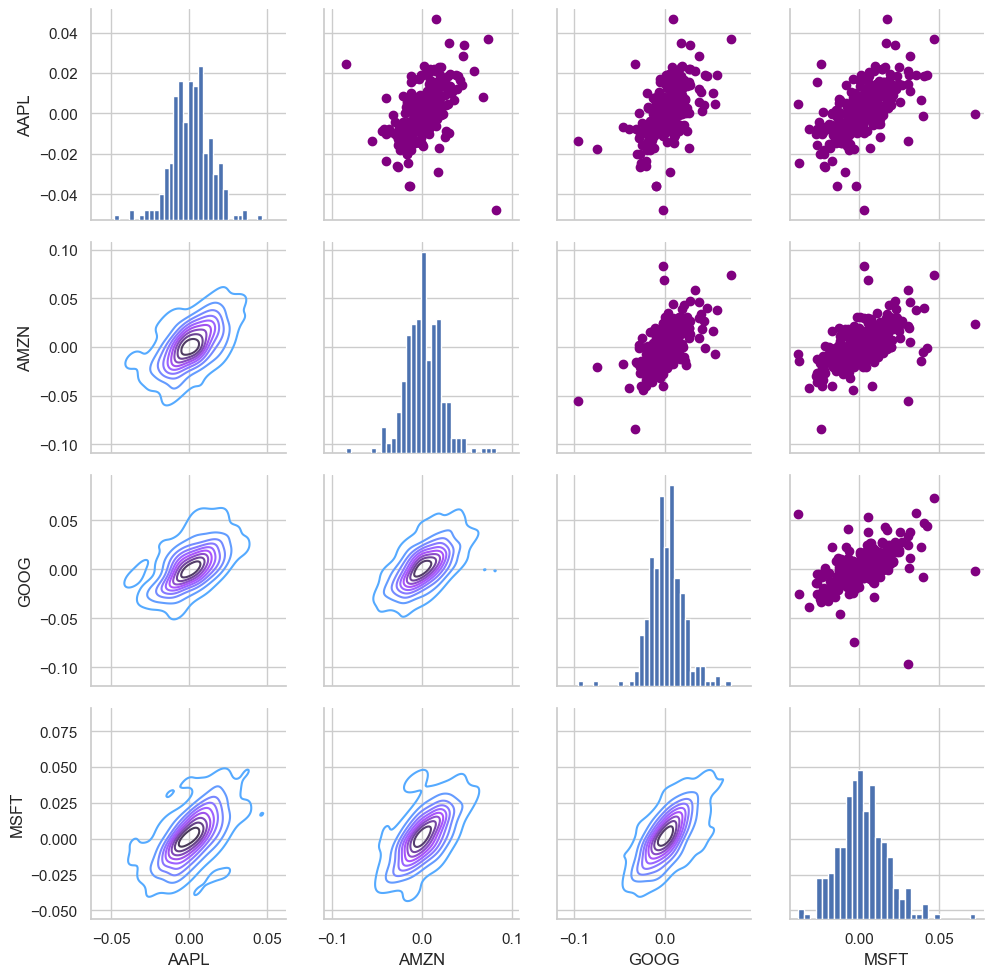

In [214]:
# Erstellen einer PairPLot-Grafik für die täglichen Renditen aller Aktien
return_fig = sns.PairGrid(tech_rets.dropna())

# Mit map_upper können wir festlegen, wie das obere Dreieck aussehen soll.
return_fig.map_upper(plt.scatter, color='purple')

# Wir können auch das untere Dreieck in der Abbildung definieren, einschließlich des Plot-Typs (kde) 
# oder die Farbkarte (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d') # kdeplot zeigt die dichte der Daten um den Mittelwert an. 

# Schließlich definieren wir die Diagonale als eine Reihe von Histogrammen der täglichen Rendite.
return_fig.map_diag(plt.hist, bins=30)

Hier sehen wir:
- Die Verteilung der Renditen für jedes Unternehmen.
- Die Beziehung zwischen den Renditen der Unternehmen.
- Gebiete der höchsten gemeinsamen Dichte (wahrscheinlichste gemeinsame Renditen) zwischen den Unternehmen.

Wenn die Punktwolken eine klare lineare Ausrichtung aufweisen, deutet das auf eine starke positive oder negative Korrelation hin. Die Histogramme zeigen die Häufigkeit von Renditeintervallen, und eine breitere Verteilung in den Histogrammen deutet auf eine höhere Volatilität hin.

#### Korrelationsmatrix 

Schließlich könnten wir auch ein Korrelationsdiagramm erstellen, um die tatsächlichen numerischen Werte für die Korrelation zwischen den täglichen Renditen der Aktien zu erhalten. 

Text(0.5, 1.0, 'Korrelation der Schlusskurse (Technologieaktien)')

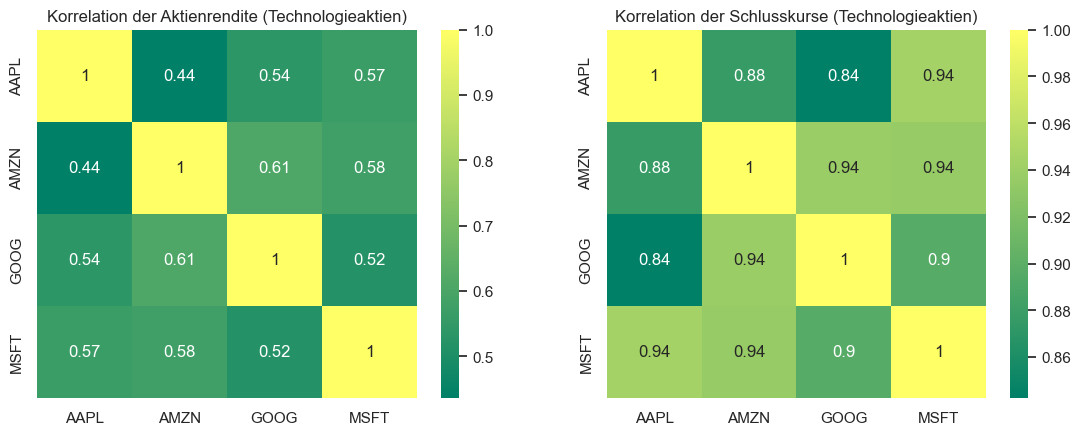

In [215]:
# Größe des Gesamtplots festlegen
plt.figure(figsize=(12, 10))

# Subplot 1: Heatmap der Korrelation der täglichen Renditen der Technologieaktien
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Korrelation der Aktienrendite (Technologieaktien)')

# Subplot 2: Heatmap der Korrelation der Schlusskurse der Technologieaktien
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Korrelation der Schlusskurse (Technologieaktien)')

Sowohl bei den Renditen als auch bei den Schlusskursen zeigen sich überaus starke Beziehungen zwischen den Tech-Aktien. Anders herum gesagt eignen sich diese Aktien nicht für eine Diversifikationsstrategie, da sie sich ähnlich verhalten.

## 5.0 Wie viel Wert setzen wir mit einer Investition in eine bestimmte Aktie aufs Spiel?

Es gibt viele Möglichkeiten, das Risiko zu quantifizieren. Eine der grundlegendsten Methoden, bei der wir die Informationen nutzen, die wir über die täglichen prozentualen Renditen gesammelt haben, ist der Vergleich der erwarteten Rendite mit der Standardabweichung der täglichen Renditen.

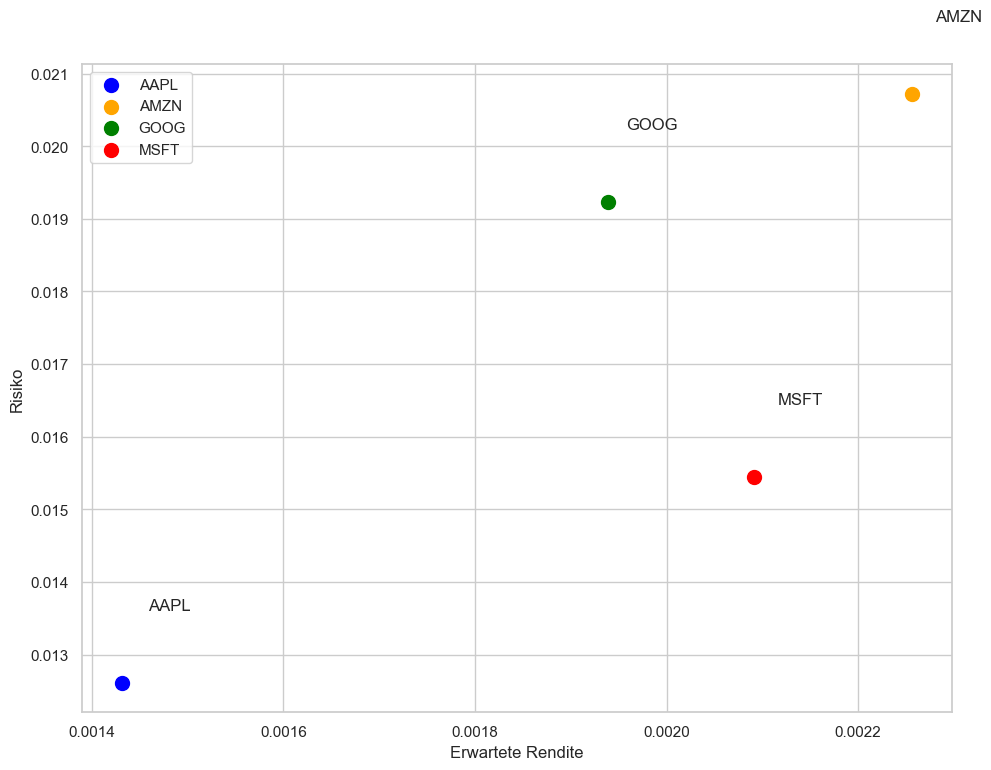

In [216]:
# Bereinigung der Renditen-Daten, um NaN-Werte zu entfernen
rets = tech_rets.dropna()

# Definition der Farben für jedes Unternehmen
colors_adj_order = ['blue', 'orange', 'green', 'red'] 

# Plot-Einstellungen für Größe
plt.figure(figsize=(10, 8))

# Größe der Punkte
area = 100

# Scatterplot erstellen und Farben zuweisen
for label, x, y, color in zip(rets.columns, rets.mean(), rets.std(), colors_adj_order):
    plt.scatter(x, y, s=area, label=label, color=color)

# Achsenbeschriftungen
plt.xlabel('Erwartete Rendite')
plt.ylabel('Risiko')

# Annotationen für jedes Unternehmen im Scatterplot
for label, x, y, color in zip(rets.columns, rets.mean(), rets.std(), colors_adj_order):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom')

# Legende hinzufügen
plt.legend()

 Auf der X-Achse haben wir die erwartete Rendite und auf der Y-Achse das Risiko, gemessen als Standardabweichung.

- Amazon (AMZN) hat die höchste erwartete Rendite, aber auch das höchste Risiko.
- Google (GOOG) hat eine etwas niedrigere Rendite als Amazon, aber auch ein geringeres Risiko.
- Microsoft (MSFT) zeigt eine niedrigere erwartete Rendite im Vergleich zu Amazon und Google, aber das Risiko scheint ähnlich dem von Google zu sein.
- Apple (AAPL) hat die niedrigste erwartete Rendite und das niedrigste Risiko unter den dargestellten Unternehmen.

Investoren würden typischerweise nach Anlagen suchen, die für ein gegebenes Niveau an Risiko die höchstmögliche Rendite bieten. In diesem Kontext könnten Investoren Amazon (AMZN) bevorzugen, wenn sie risikofreudig sind, oder Apple (AAPL), wenn sie risikoavers sind.

---

Nun berechnen wir noch zwei Schlüsselwerte aus der Finanzmathematik, um die risikobereinigte Performance unserer Aktien besser einschätzen zu können:

- Sharpe-Ratio: Ein Maß für die risikobereinigte Rendite, das die zusätzliche Rendite quantifiziert, die ein Investor erhält, indem er ein höheres Risiko eingeht. Es wird berechnet, indem die Differenz zwischen der Rendite des Portfolios und dem risikofreien Zinssatz durch die Standardabweichung der Portfoliorenditen geteilt wird.
- Sortino-Ratio: Ein Maß für die Rendite einer Investition im Verhältnis zu ihrem abwärts gerichteten Risiko (Downside-risk). Es wird ähnlich wie die Sharpe-Ratio berechnet, jedoch nur unter Berücksichtigung der negativen Abweichung der Renditen, was es zu einem besseren Maß für Portfolios macht, die nicht normal verteilt sind.


Die Sortino-Ratio konzentriert sich auf das "schlechte" Risiko, während die Sharpe-Ratio das Gesamtrisiko einer Anlagestrategie betrachtet.

In [217]:
# Risikofreier Zinssatz
risk_free_rate = 0.02097 # https://tradingeconomics.com/germany/government-bond-yield 10-jährige Staatsanleihen als Referenz

# Excess returns
excess_returns = tech_rets - risk_free_rate / 252  # Assuming 252 trading days in a year

# Sortino Ratio
negative_returns = excess_returns[excess_returns < 0]
downside_std = negative_returns.std()
sortino_ratio = excess_returns.mean() / downside_std

# Sharpe Ratio
std_dev = excess_returns.std()
sharpe_ratio = excess_returns.mean() / std_dev

# Ergebnisse ausgeben
print("Sortino Ratios:")
print(sortino_ratio)

print("\nSharpe Ratios:")
print(sharpe_ratio)

Sortino Ratios:
AAPL    0.166981
AMZN    0.168147
GOOG    0.138716
MSFT    0.239315
dtype: float64

Sharpe Ratios:
AAPL    0.106877
AMZN    0.104879
GOOG    0.096467
MSFT    0.129948
dtype: float64


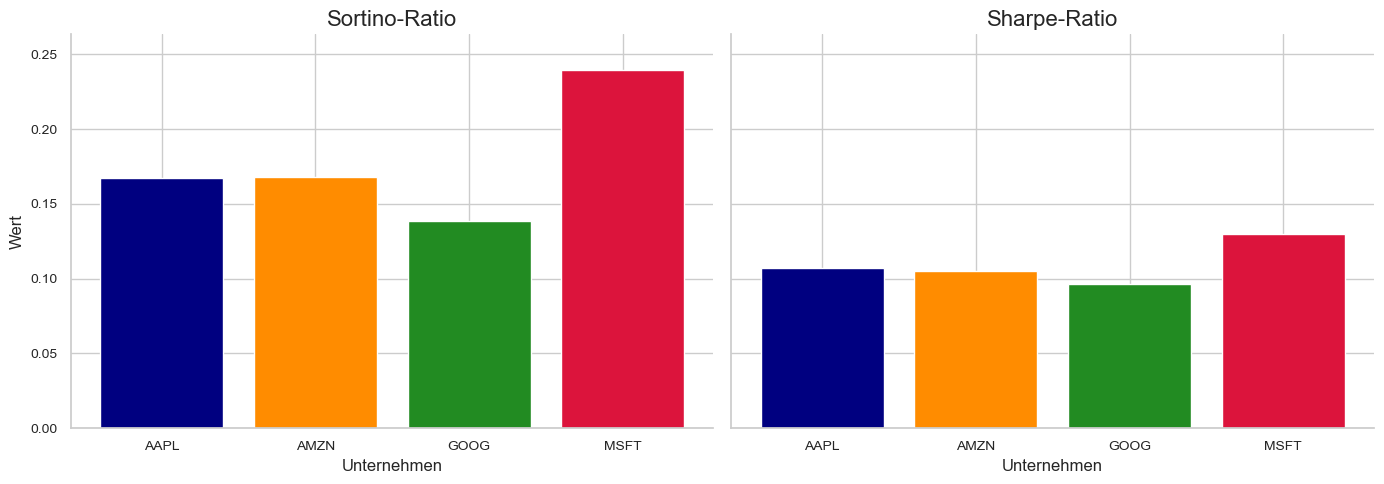

In [218]:
colors = ['navy', 'darkorange', 'forestgreen', 'crimson']
# Risikofreier Zinssatz
risk_free_rate = 0.02097  # 10-jährige Staatsanleihen als Referenz https://tradingeconomics.com/germany/government-bond-yield

# Überschussrenditen berechnen
excess_returns = tech_rets - risk_free_rate / 252  # Annahme von 252 Handelstagen im Jahr

# Sortino-Ratio berechnen
negative_returns = excess_returns[excess_returns < 0]
downside_std = negative_returns.std()
sortino_ratio = excess_returns.mean() / downside_std

# Sharpe-Ratio berechnen
std_dev = excess_returns.std()
sharpe_ratio = excess_returns.mean() / std_dev

# Plots für das Sortino- und Sharpe-Ratios erstellen
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Sortino-Ratio-Plot
ax[0].bar(sortino_ratio.index, sortino_ratio, color=colors)
ax[0].set_title('Sortino-Ratio', fontsize=16)
ax[0].set_xlabel('Unternehmen', fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Sharpe-Verhältnis-Plot
ax[1].bar(sharpe_ratio.index, sharpe_ratio, color=colors)
ax[1].set_title('Sharpe-Ratio', fontsize=16)
ax[1].set_xlabel('Unternehmen', fontsize=12)
ax[0].set_ylabel('Wert', fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Verbesserung der Gesamtästhetik der Plots
for axis in ax:
    axis.margins(y=0.1)  # Fügt oben an den Balken etwas Platz hinzu
    axis.set_ylim(bottom=0)  # Setzt das untere Limit der y-Achse auf 0

# Die Plots anzeigen
plt.tight_layout()
plt.show()

- **MSFT**  zeigt das höchste Sortino-Verhältnis, was darauf hindeutet, dass es die beste Performance im Verhältnis zu seinem abwärts gerichteten Risiko aufweist. AAPL hat auch das höchste Sharpe-Verhältnis. Damit scheint es allgemein die beste risikobereinigte Rendite aller betrachteten Aktien zu bieten
- **AMZN** und **AAPL** haben ähnliche Werte für das Sortino-Verhältnis, was darauf hinweist, dass sie eine vergleichbare Performance im Hinblick auf das abwärts gerichtete Risiko haben. Beim Sharpe-Verhältnis liegt AMZN jedoch leicht vor MSFT.
- **GOOG** hat das niedrigste Sortino- und Sharpe-Verhältnis. Das deutet darauf hin, dass es im Vergleich zu den anderen Aktien die schlechteste risikobereinigte Performance aufweist.
- ---

# 6.0 Vorhersage zukünftiger Aktienkurse

Im folgenden Abschnitt werden wir uns mit dem Kern und dem wohl spannendsten Teil unserer Arbeit befassen - der Vorhersage von Aktienkursen. Um die Übersichtlichkeit zu wahren und den Prozess bestmöglich darstellen zu können, werden wir uns hierbei nur noch auf die Aktie von Apple konzentrieren. Unser Ziel ist es, den Schlusskurs der Aktie für einen bestimmten Tag vorherzusagen. Wie zu Beginn eingangs erwähnt, werden wir dafür den LSTM-Algorithmus verwenden.

### LSTM
LSTMs (Long Short-Term Memory Units) sind eine spezielle Art von rekurrenten neuronalen Netzwerken (RNNs), die entwickelt wurden, um das Problem des verschwindenden Gradienten zu überwinden, das bei Standard-RNNs auftritt.
 
**Gradienten**: Gradienten sind die Ableitungen der Verlustfunktion in Bezug auf die Parameter des Netzwerkes. Durch die Berechnung der Gradienten können wir feststellen, welche Parameter angepasst werden müssen, um den Fehler zu verringern.
 
 
<figure>
<img src="https://miro.medium.com/v2/resize:fit:1358/1*hRgUzU3PLx_RGcBAKt5GmQ.gif" alt="alt" width="600"/>
<figcaption>Quelle: [1]</figcaption>
</figure>
 
 
**Vanishing Gradient Problem**:
Das Problem des verschwindenden Gradienten (vanishing gradient problem) in neuronalen Netzwerken beschreibt das Phänomen, dass die Gradienten (Ableitungen) der Verlustfunktion, die zur Aktualisierung der Gewichte in den Netzwerkschichten verwendet werden, exponentiell kleiner werden, je weiter sie durch die Schichten des Netzwerks zurückpropagiert werden. Dies führt dazu, dass die Gewichte in den frühen Schichten kaum aktualisiert werden und somit das Netzwerk nicht effektiv lernen kann. Besonders in tiefen Netzen mit vielen Schichten kann dies dazu führen, dass das Training sehr langsam voranschreitet oder sogar zum Stillstand kommt. Das Problem tritt häufig bei traditionellen Aktivierungsfunktionen wie Sigmoid oder Tanh auf und erschwert das Training tiefer neuronaler Netzwerke.
 
<figure>
<img src="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*6A3A_rt4YmumHusvTvVTxw.png" width="1000" height="400"
         alt="Albuquerque, New Mexico">
<figcaption>Quelle: [9]</figcaption>
</figure>
 
LSTMs (Long Short-Term Memory Units) lösen das Problem des verschwindenden Gradienten hauptsächlich durch ihre spezielle Architektur, die es ihnen erlaubt, Informationen über längere Zeiträume hinweg zu bewahren und zu kontrollieren. Sie nutzen sogenannte "Gates" (Tore), die wie Ventile funktionieren, um den Fluss der Informationen zu regulieren. Diese Tore entscheiden, welche Informationen behalten, aktualisiert oder verworfen werden sollen. Dadurch können LSTMs relevante Informationen über lange Zeiträume hinweg erhalten und unwichtige Informationen loslassen, was den Gradienten stabilisiert und ein effektives Lernen auch in tiefen Netzwerken ermöglicht. Kurz gesagt, LSTMs behalten das Wichtige und vergessen das Unnötige, wodurch sie das Problem des verschwindenden Gradienten vermeiden

## Data Preparation

### Laden der Daten

Wir erhalten neue Daten ***vom 1. Januar 2012 bis zum aktuellen Datum***, um unser Modell für **Long Short-Term Memory (LSTM)** zur Aktienprognose zu trainieren. Indem wir die Aktienkursdaten für einen erheblichen historischen Zeitraum bis zum aktuellen Datum abrufen, beabsichtigen wir, dem LSTM-Modell einen umfassenden Datensatz zur Verfügung zu stellen, der verschiedene Marktbedingungen umfasst. Dieser erweiterte Zeitrahmen ermöglicht es dem Modell, verschiedene Trends, Muster und Schwankungen in den Aktienkursen des ausgewählten Unternehmens, in diesem Fall Apple Inc. ('AAPL'), zu erfassen. Das Training des LSTM-Modells auf einem breiten und aktuellen Datensatz verbessert seine Fähigkeit, aus dem historischen Marktverhalten zu lernen und zu generalisieren, und steigert somit seine Vorhersagefähigkeiten für zukünftige Aktienbewegungen.


In [219]:
# Download der Daten
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime(2024,1,9)) # datetime.now() für aktuelles Datum

# Darstellung der Daten
display(df.head())
display(df.tail())

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.449690  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.516595  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.655555  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.787854  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.767570  394024400

Open        High         Low       Close   Adj Close   
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.639999  \
2024-01-03  184.220001  185.880005  183.429993  184.250000  184.250000   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.910004   
2024-01-05  181.990005  182.759995  180.169998  181.179993  181.179993   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.559998   

              Volume  
Date                  
2024-01-02  82488700  
2024-01-03  58414500  
2024-01-04  71983600  
2024-01-05  62303300  
2024-01-08  59144500

In [220]:
# Interaktive Visualisierung der Daten
@interact
def show_data(
              volume=(10, max(df.Volume), 10000000), 
              price=(10, max(df.Open), 1),
              start_date=widgets.DatePicker(description='Start Date', value=df.index.min().date()), 
              end_date=widgets.DatePicker(description='End Date', value=df.index.max().date())):

    # Convert start_date and end_date to pandas.Timestamp
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)

    # Filter the DataFrame
    filtered_data = df.loc[
        (df['Volume'] > volume) & 
        (df['Close'] > price) &
        (df.index >= start_date) & 
        (df.index <= end_date)
    ]

    return filtered_data

interactive(children=(IntSlider(value=750000010, description='volume', max=1506120000, min=10, step=10000000),…

### Visalisierung des Schlusskurspreises

Nun da wir die Schlusskurspreise der Aktie haben, können wir diese auch visualisieren. Wir werden die Daten mit Matplotlib zunaechst einfach visualisieren.

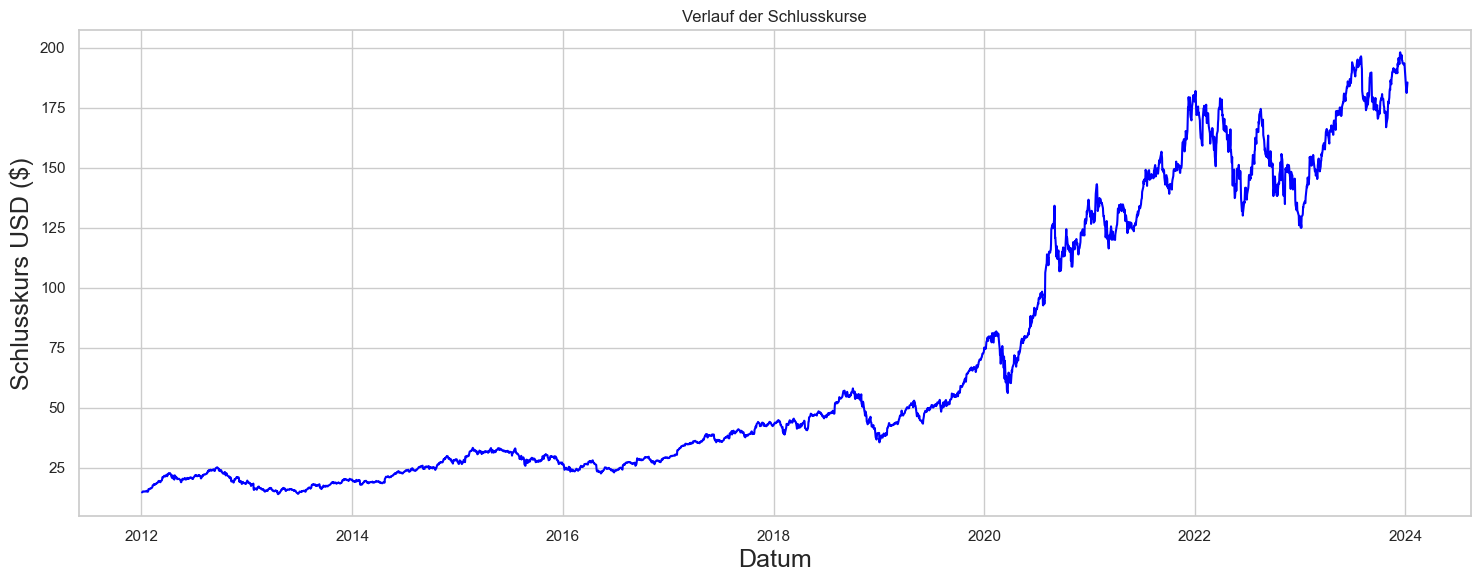

In [221]:
# Größe des Plots festlegen
plt.figure(figsize=(16,6))

# Titel des Diagramms setzen
plt.title('Verlauf der Schlusskurse')

# Linienplot der Schlusskurse erstellen
plt.plot(df['Close'], color='blue')

# Achsenbeschriftungen festlegen
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Schlusskurs USD ($)', fontsize=18)

# Plot anzeigen
plt.show()


## Data Preprocessing

In [222]:
# Entfernen des Indexes
print('DataFrame ohne index:')
data = df.reset_index(drop = True) # entfernen des Indexes, weil wir diesen zunächst nicht benötigen
display(data.head(2))

# Erstellung eines neuen Dataframes mit Schlusskursen und Volumen
print('DataFrame mit den 2 Features:')
data = data.drop(['Close', 'Low', 'High', 'Adj Close'], axis=1)
display(data.head(2))

DataFrame ohne index:


Open       High        Low      Close  Adj Close     Volume
0  14.621429  14.732143  14.607143  14.686786  12.449690  302220800
1  14.642857  14.810000  14.617143  14.765714  12.516595  260022000

DataFrame mit den 2 Features:


Open     Volume
0  14.621429  302220800
1  14.642857  260022000

In [223]:

# Interact with specification of arguments
@interact
def show_data(column=['Open', 'Volume',], x=(10, 100000, 10)):

    return df.loc[df[column] > x]

interactive(children=(Dropdown(description='column', options=('Open', 'Volume'), value='Open'), IntSlider(valu…

In [224]:
# Konvertiert den Dataframe in ein numpy array, damit wir ihn für das neuronale Netzwerk verwenden können
dataset = data.values
print(dataset[0:5])
dataset.shape

[[1.46214294e+01 3.02220800e+08]
 [1.46428566e+01 2.60022000e+08]
 [1.48196430e+01 2.71269600e+08]
 [1.49917860e+01 3.18292800e+08]
 [1.51964293e+01 3.94024400e+08]]


(3023, 2)

Gründe für die Transformation:

1. **Performance**: NumPy-Arrays bieten eine effizientere Speicherung und Verarbeitung von numerischen Daten als Pandas DataFrames, da sie direkt in C geschrieben sind und eine kontinuierliche Speicherbelegung haben.

2. **Kompatibilität**: Viele Deep-Learning-Bibliotheken, wie TensorFlow und PyTorch, arbeiten intern mit NumPy-Arrays oder ihren eigenen ähnlichen Datenstrukturen (z.B. TensorFlow Tensors oder PyTorch Tensors), die direkt aus NumPy-Arrays erzeugt werden können.

3. **Speichereffizienz**: NumPy-Arrays benötigen weniger Speicherplatz als Pandas DataFrames, da sie keine zusätzlichen Labels für Index und Spalten speichern.

4. **Geschwindigkeit**: Operationen auf NumPy-Arrays sind in der Regel schneller als auf Pandas DataFrames, da NumPy Operationen hoch optimiert sind und auf vektorisierte Berechnungen abzielen, die durch Hardware-Beschleunigung profitieren können.

5. **Batch-Verarbeitung**: Deep-Learning-Modelle verarbeiten Daten oft in Batches. NumPy-Arrays eignen sich gut für die Erstellung dieser Batches, da sie leicht in mehrdimensionale Arrays umgeformt werden können.

6. **API-Anforderungen**: Die APIs von Deep-Learning-Bibliotheken erwarten meist NumPy-Arrays als Eingabe für das Training der Modelle.

7. **Funktionalität**: Während Pandas für Datenanalyse und -manipulation ausgezeichnet ist, ist NumPy speziell für numerische Berechnungen konzipiert, was es zu einem natürlichen Werkzeug für die Vorverarbeitung von Daten für maschinelles Lernen macht.

Daher ist es eine gängige Praxis, Daten aus Pandas DataFrames in NumPy-Arrays zu konvertieren, um sie in Deep-Learning-Modellen zu verwenden.

### Skalierung der Daten

Die Verwendung eines MinMax-Scalers im Preprocessing für ein LSTM-Neuronales Netz ist essenziell, um die Daten auf einen einheitlichen Bereich zu skalieren. LSTM-Netzwerke profitieren davon, wenn die Eingangsdaten gleichmäßig skaliert sind, was die Netzwerkleistung verbessert und Probleme wie Gradientenexplosionen oder -verschwinden minimiert. Der MinMax-Scaler fördert die Stabilität des Netzwerks und verbessert die Konvergenzgeschwindigkeit während des Trainings.

In [225]:
# Skalierung der Daten
# Der MinMaxScaler wird erstellt und auf das 'dataset' angewendet, um die Daten auf den Bereich von 0 bis 1 zu skalieren.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Ausgabe der ersten fünf Zeilen der skalierten Daten
print(scaled_data[0:5])

# Ausgabe der Form (Shape) der skalierten Daten
print(f'Shape der Skalierten Daten{scaled_data.shape}')

[[0.00415585 0.18769166]
 [0.0042722  0.15921882]
 [0.00523214 0.16680792]
 [0.00616687 0.19853594]
 [0.00727807 0.24963441]]
Shape der Skalierten Daten(3023, 2)


### Train-Test-Split

In diesem Abschnitt wird die Anzahl der Zeilen festgelegt, die für das Training unseres LSTM-Modells verwendet werden sollen. Die Variable `training_data_len` wird auf etwa 95% der Gesamtanzahl der Datenpunkte im Datensatz gesetzt. Dieser Schritt zielt darauf ab, einen Großteil der Daten für das Training zu verwenden, während ein kleiner Prozentsatz für die Validierung oder Tests beiseite gelegt wird. Die Entscheidung, den Großteil der Daten für das Training zu verwenden, soll dem Modell ermöglichen, ausreichend Muster und Zusammenhänge zu lernen, um genaue Vorhersagen für zukünftige Datenpunkte, wie beispielsweise Aktienkurse, zu treffen.


Daraufhin wird der Trainingsdatensatz für ein LSTM-Neuronales Netz vorbereitet. Zunächst werden die ersten `training_data_len` Zeilen des skalierten Datensatzes ausgewählt. Anschließend erfolgt die Aufteilung dieser Daten in `x_train` und `y_train` Datensätze, wobei für jeden Datenpunkt `x_train` die vorherigen 60 Zeitschritte als Input und y_train die aktuelle Zeile als Output repräsentieren. Dies ermöglicht dem Modell, zeitliche Abhängigkeiten zu erfassen. Die resultierenden Listen werden in Numpy-Arrays umgewandelt und schließlich wird die Form der Input-Daten in ein 3D-Array umgeformt, um den Anforderungen der LSTM-Schicht gerecht zu werden. Der so vorbereitete Trainingsdatensatz ermöglicht dem LSTM-Modell, Muster in zeitlichen Abhängigkeiten zu erkennen und präzise Vorhersagen für zukünftige Zeitpunkte zu treffen.

In [226]:
# Erstellung einer Datenstruktur (funktioniert nicht bei nur einem Merkmal)
def create_data(df, n_future, n_past, train_test_split_percentage, validation_split_percentage):
    """
    Creates input and output data structures for time series forecasting from a given DataFrame.

    This function processes a DataFrame to extract sequences of past observations as input features 
    and future values as output labels, suitable for training forecasting models.

    Parameters:
    - df (DataFrame): The input DataFrame containing time series data.
    - n_future (int): The number of future data points to predict.
    - n_past (int): The number of past data points to use for prediction.
    - train_test_split_percentage (float): The percentage of the dataset to include in the train set.
    - validation_split_percentage (float): The percentage of the training set to include in the validation set.

    Returns:
    - x_train (ndarray): Input features for the training set.
    - x_test (ndarray): Input features for the test set.
    - x_val (ndarray): Input features for the validation set.
    - y_train (ndarray): Output labels for the training set.
    - y_test (ndarray): Output labels for the test set.
    - y_val (ndarray): Output labels for the validation set.
    - split_training_test_starting_point (int): The index where the test set starts.
    - split_train_validation_starting_point (int): The index where the validation set starts.

    The function prints out the starting points for the validation and test sets and is not designed to handle 
    datasets with only a single feature.
    """
    
    n_feature = df.shape[1]
    x_data, y_data = [], []
    
    # Durchlaufe den Datensatz, um Eingabe- und Ausgabedaten zu erstellen
    for i in range(n_past, len(df) - n_future + 1):
        x_data.append(df[i - n_past:i, 0:n_feature])
        y_data.append(df[i + n_future - 1:i + n_future, 0])
    
    # Bestimmung der Startpunkte für Training, Validierung und Test
    split_training_test_starting_point = int(round(train_test_split_percentage * len(x_data)))
    split_train_validation_starting_point = int(round(split_training_test_starting_point * (1 - validation_split_percentage)))
    
    # Ausgabe der Startpunkte für Validierung und Test
    print(f'Validierungsset Startpunkt: {split_train_validation_starting_point}')
    print(f'Testset Startpunkt: {split_training_test_starting_point}')
    
    # Aufteilung der Daten in Trainings-, Validierungs- und Testsets
    x_train = x_data[:split_train_validation_starting_point]
    y_train = y_data[:split_train_validation_starting_point]
    
    # Wenn Sie das Validierungsset selbst auswählen möchten, kommentieren Sie den folgenden Code aus.
    x_val = x_data[split_train_validation_starting_point:split_training_test_starting_point]
    y_val = y_data[split_train_validation_starting_point:split_training_test_starting_point]                                             
    
    x_test = x_data[split_training_test_starting_point:]
    y_test = y_data[split_training_test_starting_point:]
    
    # Rückgabe der erstellten Datenstrukturen
    return np.array(x_train), np.array(x_test), np.array(x_val), np.array(y_train), np.array(y_test), np.array(y_val), split_training_test_starting_point, split_train_validation_starting_point


In [227]:
# Erstellung von Trainings-, Validierungs- und Testdaten mithilfe der Funktion 'create_data'
X_train, X_test, X_val, y_train, y_test, y_val, test_starting_point, validation_starting_point = create_data(df=scaled_data, n_future=1, n_past=60, train_test_split_percentage=0.8, validation_split_percentage=0.1)

# Ausgabe der Form (Shape) der Features
print("Form der Trainingsfeatures:", X_train.shape)
print("Form der Validierungsfeatures:", X_val.shape)
print("Form der Testfeatures:", X_test.shape)

# Ausgabe der Form (Shape) der Targets
print("Form der Trainings-Target:", y_train.shape)
print("Form der Validierungs-Target:", y_val.shape)
print("Form der Test-Target:", y_test.shape)

Validierungsset Startpunkt: 2133
Testset Startpunkt: 2370
Form der Trainingsfeatures: (2133, 60, 2)
Form der Validierungsfeatures: (237, 60, 2)
Form der Testfeatures: (593, 60, 2)
Form der Trainings-Target: (2133, 1)
Form der Validierungs-Target: (237, 1)
Form der Test-Target: (593, 1)


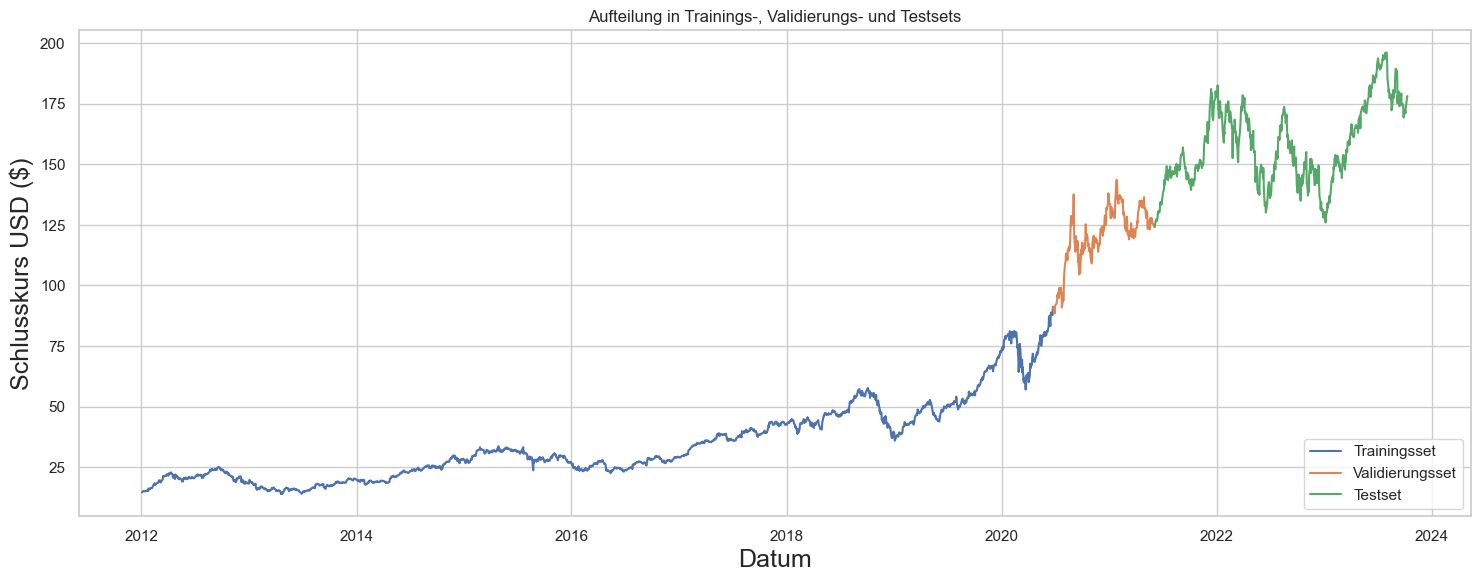

In [228]:
# Filtern der Daten entsprechend der Aufteilung in Trainings-, Validierungs- und Testsets
Train_Time_df = df.iloc[:validation_starting_point]
Val_Time_df = df.iloc[validation_starting_point:test_starting_point]
Test_Time_df = df.iloc[test_starting_point:test_starting_point+len(y_test)] # Anpassung hier, um die genaue Länge des Testsets zu erhalten

# Visualisierung der Daten
plt.figure(figsize=(16,6))
plt.title('Aufteilung in Trainings-, Validierungs- und Testsets')
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Schlusskurs USD ($)', fontsize=18)
plt.plot(Train_Time_df['Open'])
plt.plot(Val_Time_df['Open'])
plt.plot(Test_Time_df['Open'])
plt.legend(['Trainingsset', 'Validierungsset', 'Testset'], loc='lower right')
plt.show()

## Modeling
 
Bevor wir in die Konfiguration unseres Algorithmuses einsteigen, ist es wichtig, dass wir die Grundbegriffe verstehen.
 
In einem neuronalen Netzwerk haben wir unterschiedliche Komponenten, die jeweils eine spezielle Funktion erfüllen:
 
### Elemente im LSTM-Modell:
 
#### Neuronen
- Neuronen sind die grundlegenden Bausteine eines neuronalen Netzwerks. Sie empfangen Eingabesignale, verarbeiten diese durch gewichtete Summen und eine Aktivierungsfunktion und geben das Ergebnis weiter.
- Die "Gewichte" in den Neuronen werden im Trainingsprozess angepasst, um bestimmte Muster in den Daten zu erkennen.
 
#### LSTM-Schichten
- LSTM (Long Short-Term Memory) Schichten bestehen aus LSTM-Zellen, einer speziellen Art von Neuronen, die darauf ausgelegt sind, Informationen über längere Zeiträume hinweg zu speichern und zu verarbeiten.
- Sie sind besonders geeignet für sequentielle Daten, wie Zeitreihen oder Text, da sie sich an wichtige Informationen aus der Vergangenheit erinnern und unwichtige Informationen verwerfen können.
 
#### Dense-Schichten
- Nach den LSTM-Schichten kommen oft Dense Schichten, auch vollständig verbundene Schichten genannt, da jedes Neuron mit jedem Neuron der vorherigen Schicht verbunden ist.
- Diese Schichten dienen dazu, die von den LSTM-Schichten erlernten abstrakten Muster in eine konkrete Ausgabe umzuwandeln, wie z.B. eine Vorhersage für Regression oder Klassifikation.
 
<figure>
<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs11869-020-00915-6/MediaObjects/11869_2020_915_Fig4_HTML.png" width="600" 
         alt="Albuquerque, New Mexico">
<figcaption>Quelle: [2]</figcaption>
</figure>
 
In dem gegebenen Kontext unseres LSTM-Modells:
- Die **LSTM-Schichten** verarbeiten Eingabedaten (z.B. Aktienkurse über Zeit) und extrahieren relevante Merkmale, indem sie zeitliche Abhängigkeiten lernen.
- Die **Dense-Schichten** nehmen diese extrahierten Merkmale und führen sie zusammen, um eine finale Vorhersage zu treffen. Hier wird das finale Neuron in der letzten Dense-Schicht den nächsten erwarteten Aktienkurs ausgeben.
 
Daneben gibt es in der Praxis noch weitere Schichten, die in unserem basis Fall jedoch nicht zum Einsatz kommen:
 
#### Dropout Schichten
- Reduzieren Overfitting durch zufälliges Ignorieren von Neuronen während des Trainings.
- Fördern die Generalisierung des Modells, indem sie eine robustere interne Repräsentation erzwingen.
 
#### GRU Schichten
- Helfen dem Modell, Langzeitabhängigkeiten in Daten durch Update- und Reset-Gates zu erfassen.
- Sind effizienter als traditionelle LSTM-Schichten, da sie weniger Parameter haben und schneller trainieren.

### Modell - Erstellung und Konfiguration

Im nachfolgenden Code passiert folgendes:

1. Modellerstellung
   - Zunächst wird ein `Sequential`-Modell initialisiert, welches es erlaubt, Schichten in einer linearen Abfolge zu stapeln.
   - Dann wird die erste `LSTM` Schicht mit **128 Neuronen** hinzugefügt. Sie verarbeitet und gibt die Sequenzen aus (`return_sequences=True`), die als Eingabe für die nächste Schicht dienen. Die erste Schicht ist dafür zuständig, lang- und kurzfristige Abhängigkeiten in den Daten zu lernen.
   - Die zweite `LSTM` Schicht hat **64 Neuronen** und gibt nur den letzten Ausgabewert aus (`return_sequences=False`), was typisch für den Übergang zu dicht verbundenen Schichten ist.
   - Eine `Dense` Schicht mit **25 Neuronen** wird als Zwischenschicht für die Merkmalsextraktion hinzugefügt. Diese Schicht dient als eine Art von Merkmalsextraktion, wo die hochdimensionale Datenrepräsentation, die von den vorherigen LSTM-Schichten kommt, in eine niedrigere Dimension umgewandelt wird
   - Die letzte `Dense` Schicht besteht aus einem **einzigen Neuron**, das die finale Vorhersage trifft. Da es sich um eine Dense-Schicht handelt, nimmt sie alle Features aus der vorherigen Schicht auf und kombiniert sie zu einem einzigen Ausgabewert. In unserem Regressionsmodell ist dieser Wert die vorhergesagte kontinuierliche Variable, also der Aktienkurs.

2. Modellkompilierung:
   - Der `adam` Optimierer und der Verlustfunktion `mean_squared_error` werden festgelegt, um das Netzwerk für die Vorhersagegenauigkeit zu optimieren.

3. Modelltraining:
   - Das Modell wird auf den Trainingsdaten (`x_train`, `y_train`) mit einer bestimmten `batch_size` und einer bestimmten Anzhal an Epochn `epoch` trainiert. 

#### Modell 1 - Modellierung

In [229]:
# Shape der Trainingsdaten
print(f'Shape der Traingsdaten: {X_train.shape}')
print(f'Anzahl der Datensätze: {X_train.shape[0]}')
print(f'Anzahl der Zeitschritte: {X_train.shape[1]}')
print(f'Anzahl der Features (Close & Volume): {X_train.shape[2]}')

Shape der Traingsdaten: (2133, 60, 2)
Anzahl der Datensätze: 2133
Anzahl der Zeitschritte: 60
Anzahl der Features (Close & Volume): 2


In [230]:
# Aufbau des LSTM-Modells
model = Sequential(name='Einfaches_LSTM')

# Hinzufügen der ersten LSTM-Schicht mit 128 Neuronen, Rückgabe von Sequenzen und Angabe der Eingabeform
model.add(LSTM(128, name='Input_layer', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # 128 Neuronen, 60 Zeitschritte, 2 Features

# Hinzufügen der zweiten LSTM-Schicht mit 64 Neuronen und Rückgabe von Sequenzen
model.add(LSTM(64, name='Hidden_Layer_LSTM', return_sequences=False))  # 64 Neuronen

# Hinzufügen der ersten Dense-Schicht mit 25 Neuronen
model.add(Dense(25, name='Hidden_Dense_Layer'))

# Hinzufügen der Ausgabeschicht mit einem Neuron für die Vorhersage
model.add(Dense(1, name='Output_Layer'))

# Kompilieren des Modells mit dem Adam-Optimizer, Mean Squared Error als Verlustfunktion und Root Mean Squared Error als Metrik
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Anzeigen der Struktur des Modells
model.summary()

Model: "Einfaches_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (LSTM)          (None, 60, 128)           67072     
                                                                 
 Hidden_Layer_LSTM (LSTM)    (None, 64)                49408     
                                                                 
 Hidden_Dense_Layer (Dense)  (None, 25)                1625      
                                                                 
 Output_Layer (Dense)        (None, 1)                 26        
                                                                 
Total params: 118131 (461.45 KB)
Trainable params: 118131 (461.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Modell 1 - Visualisierung

Das `None` in den Eingabe- und Ausgabeformen der Schichten eines Keras-Modells steht für eine variable Batch-Größe. Es bedeutet, dass die Anzahl der Beispiele, die das Modell auf einmal verarbeiten kann, flexibel ist und nicht im Voraus festgelegt werden muss. Dies ist nützlich, wenn wir das Modell auf verschiedene Batch-Größen skalieren wollen, ohne es neu trainieren zu müssen. 

![Basis Modell](basis_model_plot.png)


In [231]:
# # Plot the model architecture and display it in the notebook

# plot_model(model, to_file='basis_model_plot.png', show_shapes=True, show_layer_names=True)

# # plot_model(model, show_shapes=True, show_layer_names=True, to_file='basis_model_plot.png')
# # Image('basis_model_plot.png')

#### Modell 1 - Training

**Epochs:**
Epochen geben an, wie oft ein maschinelles Lernmodell den gesamten Trainingsdatensatz während des Trainings durchläuft. Jede Epoche umfasst einen Vorwärts- und Rückwärtsdurchlauf für alle Trainingsbeispiele.

**Batch Size:**
Die Batch-Größe definiert die Anzahl der Beispieldaten, die das Netzwerk gleichzeitig verarbeitet, bevor ein Update der Modellgewichte erfolgt. Eine Größe von 64 bedeutet, dass 64 Datenpunkte durch das Netzwerk laufen, bevor der Backpropagation-Prozess beginnt. Sie beeinflusst die Berechnungseffizienz, wobei größere Batches eine parallele Verarbeitung für ein schnelleres Training ermöglichen. Sehr große Batches können jedoch mehr Speicherplatz erfordern. Kleinere Batches können Regularisierungseffekte und potenziell bessere Generalisierung bieten.

- Beispiel: Bei 1.000 Trainingsproben und einer Batch-Größe von 32 umfasst jede Epoche 31,25 Aktualisierungen des Modells. Die Anpassung von Epochen und Batch-Größe sorgt für ein Gleichgewicht zwischen Trainingsgeschwindigkeit und Modellgeneralisierung.

**validation_split_** Dieser Parameter teilt den Trainingsdatensatz in zwei Teile auf: 70% der Daten werden für das Training verwendet und die restlichen 30% bilden den Validierungsdatensatz. Das Modell wird an den Trainingsdaten trainiert, während der Validierungsdatensatz dazu dient, die Leistung des Modells nach jeder Epoche zu überprüfen, um Overfitting zu erkennen.



In [232]:
# Trainingparameters
batch_size = 64
epochs = 20
validation_split=0.3

# Trainieren des Modells
model_history  = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/20


24/24 [==============================] - 5s 71ms/step - loss: 9.0659e-04 - root_mean_squared_error: 0.0301 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0786
Epoch 2/20
24/24 [==============================] - 1s 46ms/step - loss: 1.2749e-04 - root_mean_squared_error: 0.0113 - val_loss: 8.5548e-04 - val_root_mean_squared_error: 0.0292
Epoch 3/20
24/24 [==============================] - 1s 46ms/step - loss: 3.5263e-05 - root_mean_squared_error: 0.0059 - val_loss: 3.6850e-04 - val_root_mean_squared_error: 0.0192
Epoch 4/20
24/24 [==============================] - 1s 46ms/step - loss: 2.6709e-05 - root_mean_squared_error: 0.0052 - val_loss: 3.9155e-04 - val_root_mean_squared_error: 0.0198
Epoch 5/20
24/24 [==============================] - 1s 46ms/step - loss: 2.6891e-05 - root_mean_squared_error: 0.0052 - val_loss: 3.7137e-04 - val_root_mean_squared_error: 0.0193
Epoch 6/20
24/24 [==============================] - 1s 47ms/step - loss: 2.7274e-05 - root_mean_squared_error: 0.0052 - 

In [233]:
# Alle Metriken anzeigen die in dem Modell aufgzeichent werden
model_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

#### Modell 1 - Evaluation

##### Loss & RMSE

1. **Loss (MSE)**: Ein Maß für den Fehler des Modells während des Trainings, der die Differenz zwischen den Vorhersagen des Modells und den tatsächlichen Werten quantifiziert. 

<img src="https://miro.medium.com/v2/resize:fit:675/1*JBz5iiXGzjUKyc8v9YDrEQ.png" alt="drawing" width="400"/>

   
2.  **RMSE (Root Mean Square Error)**: Eine Metrik, die den durchschnittlichen Fehler zwischen den Vorhersagen des Modells und den tatsächlichen Werten misst, wobei größere Fehler stärker gewichtet werden, indem die Wurzel aus dem Durchschnitt der quadrierten Abweichungen genommen wird.

<img src="https://editor.analyticsvidhya.com/uploads/56967RMSE.png" alt="drawing" width="400"/>

Die Graphen sind nützlich, um zu beurteilen, wie gut das Modell im Laufe der Zeit lernt und ob es möglicherweise Overfitting oder Underfitting gibt. Ein Overfitting würde sich durch einen fallenden Trainingsfehler bei gleichzeitig steigendem oder stagnierendem Validierungsfehler zeigen. Ein Underfitting würde sich durch hohe Fehlerwerte sowohl im Training als auch in der Validierung äußern.

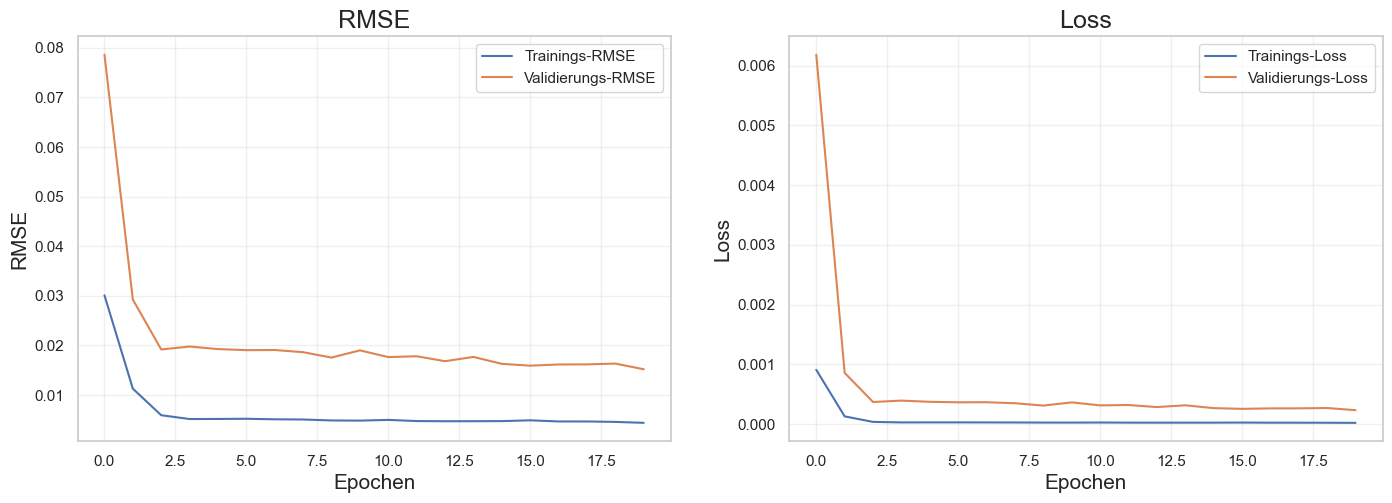

In [234]:
# Erstellung einer Abbildung (Figure) für die Darstellung von Modellmetriken über die Epochen
fig = plt.figure(figsize=(15,5))

# Hinzufügen des ersten Subplots für die RMSE-Metrik
fig.add_subplot(121)

# Plotten der Trainings- und Validierungs-RMSE über die Epochen
plt.plot(model_history.epoch, model_history.history['root_mean_squared_error'], label="Trainings-RMSE")
plt.plot(model_history.epoch, model_history.history['val_root_mean_squared_error'], label="Validierungs-RMSE")

# Einstellungen für den ersten Plot (RMSE)
plt.title("RMSE", fontsize=18)
plt.xlabel("Epochen", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

# Hinzufügen des zweiten Subplots für die Loss-Metrik
fig.add_subplot(122)

# Plotten der Trainings- und Validierungs-Loss über die Epochen
plt.plot(model_history.epoch, model_history.history['loss'], label="Trainings-Loss")
plt.plot(model_history.epoch, model_history.history['val_loss'], label="Validierungs-Loss")

# Einstellungen für den zweiten Plot (Loss)
plt.title("Loss", fontsize=18)
plt.xlabel("Epochen", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

# Anzeigen der erstellten Abbildung
plt.show()


Der Plot zeigt zwei Graphen, die die Leistung unseres Basis-Modells über die Anzahl der Epochen darstellen. Auf der linken Seite wird der RMSE (Root Mean Square Error) und auf der rechten Seite der Loss (MSE) dargestellt.

Wir sehen: 
- Einen anfänglichen Abfall, was darauf hindeutet, dass das Modell schnell lernt.
- Nach dem initialen Abfall flachen beide Kurven ab, was typisch ist, da die Leistung konvergiert und weniger Raum für Verbesserungen besteht.
- Es gibt keinen klaren Hinweis auf Overfitting, da beide Kurven zusammen abfallen und konvergieren, ohne dass der Validierungsfehler wieder ansteigt.
- Ebenso gibt es keinen offensichtlichen Beweis für Underfitting, da beide Fehler mit der Zeit abnehmen und keine hohe Fehlerquote beibehalten wird.

In [235]:
# Berechung der Metriken für das Modell
results = model.evaluate(X_test, y_test)
print("test loss, test RMSE:", np.round(results, 4))

19/19 [==============================] - 1s 12ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333
test loss, test RMSE: [0.0011 0.0333]


##### Prediction vs. Real - Grafische Darstellung

In diesem Unterkapitel des Notebooks widmen wir uns der Auswertung der Vorhersageleistung unseres Modells im Vergleich zu den tatsächlichen Aktienkursen. Durch den direkten Vergleich der prognostizierten und realen Eröffnungskurse können wir die Genauigkeit und Zuverlässigkeit unseres Vorhersagemodells beurteilen.

Das Diagramm zeigt die tatsächlichen Eröffnungskurse von Aktien (in Rot dargestellt) und die vom Modell vorhergesagten Preise (in Gelb dargestellt), wobei letztere auf die ursprüngliche Skala zurückskaliert wurden. Auffällig ist die enge Übereinstimmung beider Kurven, was auf ein hohes Maß an Präzision des Modells hindeutet. An verschiedenen Stellen, insbesondere um die Datenpunkte 100, 300 und 500, folgt die Vorhersagekurve der realen Preisentwicklung mit bemerkenswerter Genauigkeit. Dies deutet darauf hin, dass das Modell die zugrundeliegenden Muster der Preisbewegungen effektiv erfasst hat, was für den Einsatz in der Praxis vielversprechend ist. Nichtsdestotrotz gibt es Bereiche, wie etwa zwischen den Punkten 200 und 300, wo die Vorhersage von der tatsächlichen Preislinie abweicht, was auf Verbesserungspotenzial im Modell oder auf unvorhersehbare Marktereignisse hindeuten könnte.


19/19 [==============================] - 1s 12ms/step


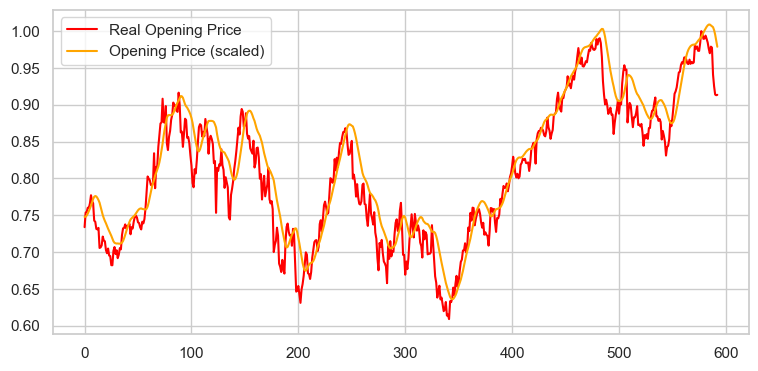

In [236]:
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k')

# Angenommen, 'df' ist Ihr DataFrame und 'test_starting_point' ist der Index, bei dem Ihre Testdaten beginnen.
# Plotten Sie die realen Eröffnungskurse.
plt.plot(y_test, color='red', label='Real Opening Price')

# Plot der vorhergesagten Eröffnungspreise
plt.plot(y_pred, color='orange', label='Opening Price (scaled)')

plt.legend(loc='best')
plt.show()

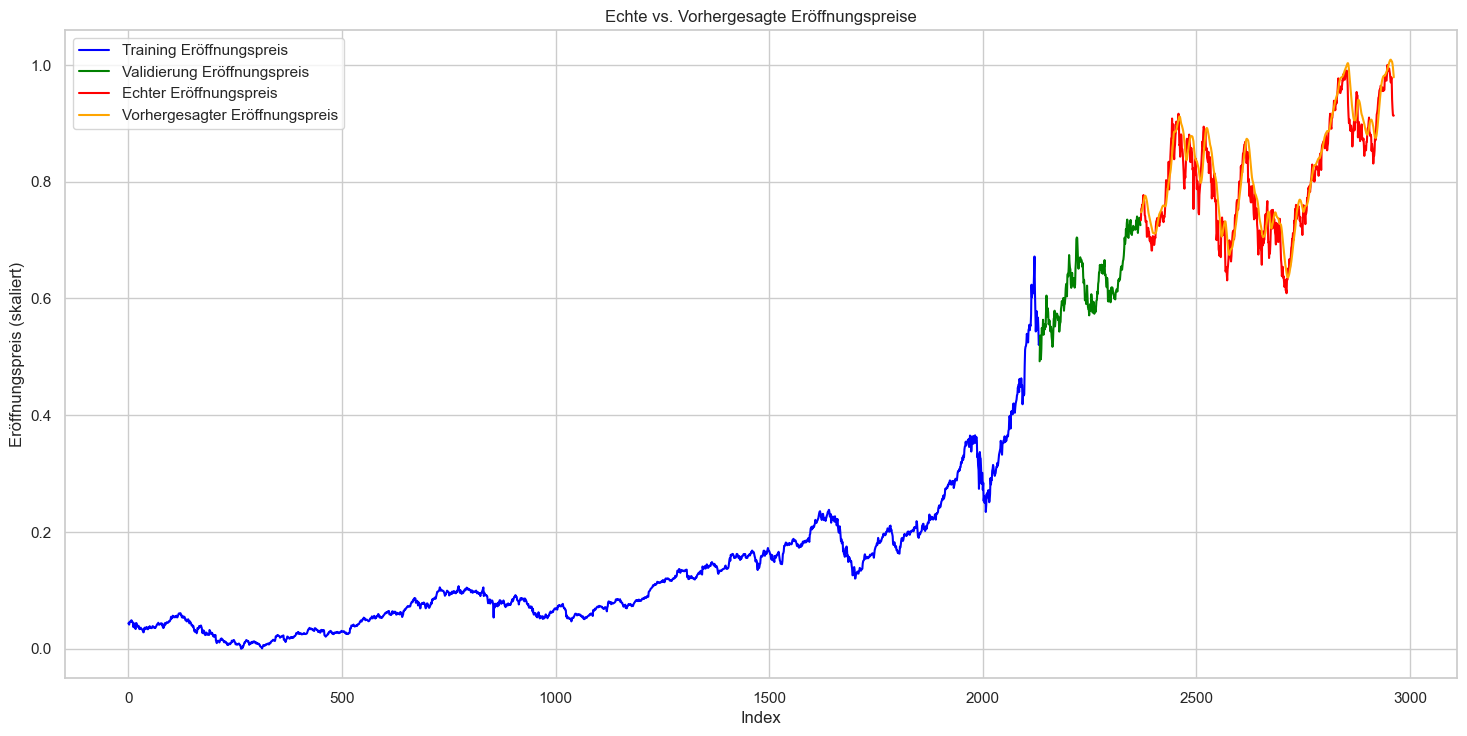

In [237]:
# Berechnung des Index, an dem y_val endet
val_end_index = len(y_train) + len(y_val)

# Erstellen einer Abbildung für die Darstellung von echten und vorhergesagten Eröffnungspreisen
plt.figure(figsize=(16, 8), dpi=100, facecolor='w', edgecolor='k')

# Plotten der echten Eröffnungspreise für das Training
plt.plot(np.arange(len(y_train)), y_train, color='blue', label='Training Eröffnungspreis')

# Plotten der echten Eröffnungspreise für die Validierung
plt.plot(np.arange(len(y_train), val_end_index), y_val, color='green', label='Validierung Eröffnungspreis')

# Plotten der echten Eröffnungspreise für den Test
plt.plot(np.arange(val_end_index, val_end_index + len(y_test)), y_test, color='red', label='Echter Eröffnungspreis')

# Plotten der vorhergesagten Eröffnungspreise, beginnend mit dem letzten Wert von y_val
plt.plot(np.arange(val_end_index, val_end_index + len(y_test)), y_pred, color='orange', label='Vorhergesagter Eröffnungspreis')

# Anzeigen der Legende an der besten Position
plt.legend(loc='best')
plt.xlabel('Index')
plt.ylabel('Eröffnungspreis (skaliert)')
plt.title('Echte vs. Vorhergesagte Eröffnungspreise')
plt.show()

##### Inverse Scaling & Hinzufügen des Datums

Um die vorhergesagten Werte (`y_pred`) sowie die Trainings- (`y_train`), Validierungs- (`y_val`) und Testdaten (`y_test`) von der skalierten zurück in die ursprüngliche Größenordnung zu bringen, müssen wir den Prozess der Skalierung umkehren. Hierfür nutzen wir die `inverse_transform`-Methode des `MinMaxScaler`. Da unser Modell auf einem Datensatz mit zwei Merkmalen (Schlusskursen und Volumen) trainiert wurde, der `MinMaxScaler` aber nur die Vorhersagen für ein einzelnes Merkmal (den Eröffnungspreis) umkehren soll, müssen wir folgende Schritte durchführen:

1. **Erstellen Temporärer Arrays:** Für jedes Datenset (`y_train`, `y_val`, `y_test`, `y_pred`) erstellen wir ein temporäres Array. Die Anzahl der Zeilen in diesen Arrays entspricht der Länge der jeweiligen Daten und die Anzahl der Spalten der Anzahl der Merkmale im ursprünglichen, zur Anpassung des Scalers verwendeten Datensatz.

2. **Befüllen des Relevanten Merkmals:** In das relevante Merkmal (Spalte) dieser temporären Arrays tragen wir die Daten von `y_train`, `y_val`, `y_test`, `y_pred` ein. Diese Daten müssen gegebenenfalls zuvor mit der Methode `ravel()` in ein 1D-Array umgewandelt werden.

3. **Inverse Transformation:** Wir wenden die `inverse_transform`-Methode des `MinMaxScaler` auf diese temporären Arrays an.

4. **Extrahieren der Ursprünglichen Werte:** Aus den umgekehrten Transformationsergebnissen extrahieren wir die relevanten Spalten, die nun die unskalierten Werte enthalten.


Zuletzt fügen wir den Datumsindex wieder hinzu, um den zeitlichen Bezug wiederherzustellen.


In [238]:
# Create temporary arrays for inverse transformation
temp_train = np.zeros((len(y_train), 2))  # Adjust the number of columns as per your dataset
temp_val = np.zeros((len(y_val), 2))
temp_test = np.zeros((len(y_test), 2))
temp_pred = np.zeros((len(y_pred), 2))

# Fill the relevant column (assuming the first column) with the data
temp_train[:, 0] = y_train.ravel()
temp_val[:, 0] = y_val.ravel()
temp_test[:, 0] = y_test.ravel()
temp_pred[:, 0] = y_pred.ravel()

# Inverse transform to get unscaled values
unscaled_y_train = scaler.inverse_transform(temp_train)[:, 0]
unscaled_y_val = scaler.inverse_transform(temp_val)[:, 0]
unscaled_y_test = scaler.inverse_transform(temp_test)[:, 0]
unscaled_y_pred = scaler.inverse_transform(temp_pred)[:, 0]

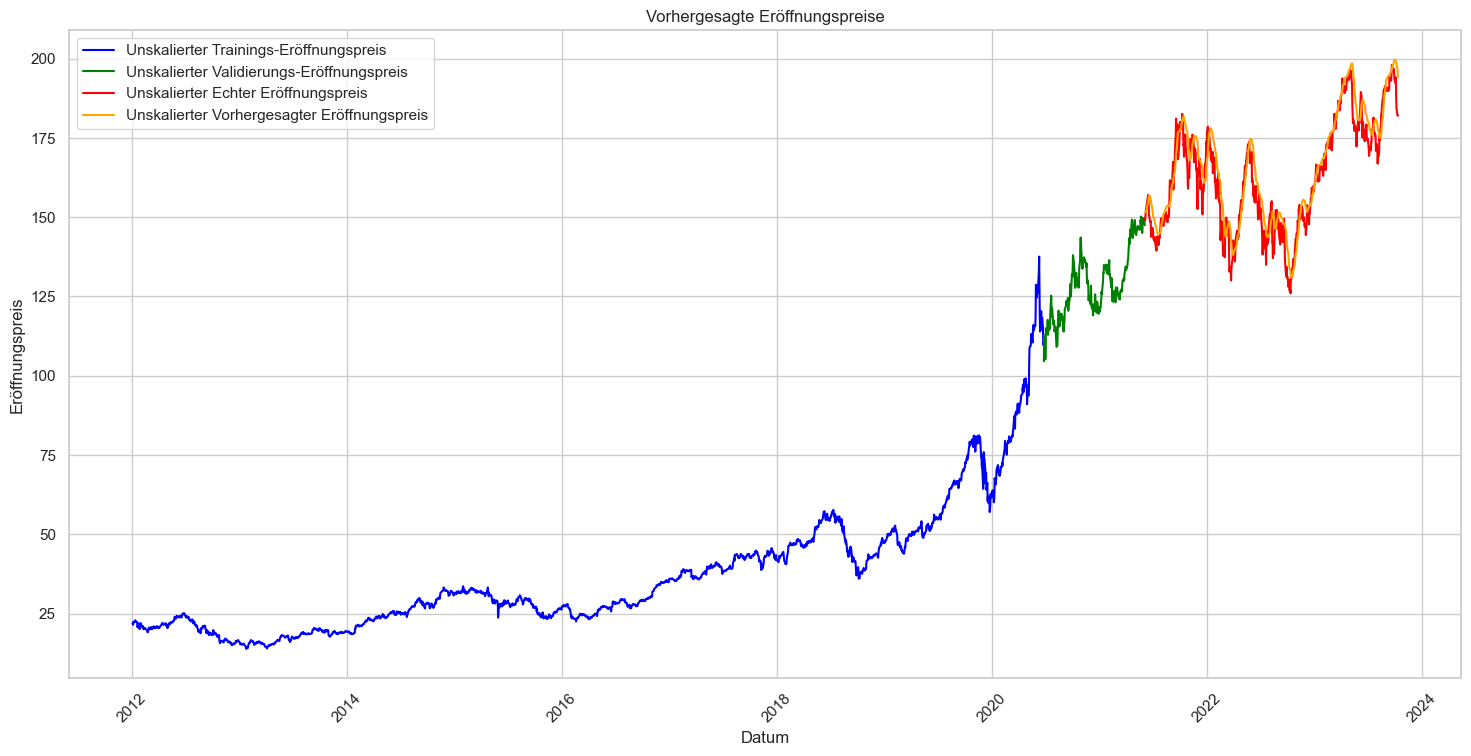

In [239]:
# Assuming df is indexed by trading days and not calendar days
# Dynamically calculate the indices
train_end_index = len(unscaled_y_train)
val_end_index = train_end_index + len(unscaled_y_val)
test_end_index = val_end_index + len(unscaled_y_test)

# Adjust for periodicity
# Assuming df has continuous trading dates, adjust indices to skip non-trading days
# This can be complex if df has missing dates or irregular intervals

# Extract the dynamic date indices for each data segment
train_dates = df.index[:train_end_index]
val_dates = df.index[train_end_index:val_end_index]
test_dates = df.index[val_end_index:test_end_index]

# Assuming unscaled_y_pred aligns with the test_dates
pred_dates = test_dates

# Plotting
plt.figure(figsize=(16, 8), dpi=100, facecolor='w', edgecolor='k')

# Plot Unscaled Training Prices
plt.plot(train_dates, unscaled_y_train, color='blue', label='Unskalierter Trainings-Eröffnungspreis')

# Plot Unscaled Validation Prices
plt.plot(val_dates, unscaled_y_val, color='green', label='Unskalierter Validierungs-Eröffnungspreis')

# Plot Unscaled Test Prices
plt.plot(test_dates, unscaled_y_test, color='red', label='Unskalierter Echter Eröffnungspreis')

# Plot Unscaled Predicted Prices (overlapping with test dates)
plt.plot(pred_dates, unscaled_y_pred, color='orange', label='Unskalierter Vorhergesagter Eröffnungspreis')

plt.legend(loc='best')
plt.xlabel('Datum')
plt.ylabel('Eröffnungspreis')
plt.title('Vorhergesagte Eröffnungspreise')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

### Hyperparameter Tuning

#### Early Stopping

`es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)`

In der Fallstudie wird die Technik des frühzeitigen Beendens (Early Stopping) implementiert, um eine Überanpassung des Modells zu verhindern und die Trainingszeit zu optimieren. Dabei beobachtet die EarlyStopping-Funktion den Validierungsverlust (`val_loss`) und beendet das Training, wenn über **fünf Epochen** hinweg (`patience=5`) keine Verbesserung (Mode `min`) mehr festgestellt wird. Dieses Vorgehen gewährleistet, dass das Modell nur solange trainiert wird, wie es Fortschritte macht, und spart wertvolle Ressourcen, die andernfalls durch unnötiges Training verschwendet würden.


#### Modell Checkpoint

`mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)`

IZusätzlich zur EarlyStopping-Strategie die `ModelCheckpoint-Funktion` eingesetzt, um das bestmögliche Modell während des Trainingsprozesses zu sichern. Die ModelCheckpoint-Komponente überwacht kontinuierlich den Validierungsverlust (`val_loss`) und speichert das Modell automatisch ab, wenn eine Verbesserung festgestellt wird – dabei wird nur die beste Ausführung (`save_best_only=True`) gemäß dem minimalen Verlustprinzip (`mode='min'`) gespeichert. Diese Methode dient dazu, den Fortschritt des Modelltrainings effektiv zu konservieren und sicherzustellen, dass nach Abschluss des Trainings die leistungsfähigste Version des Modells für weitere Analysen oder Anwendungen verfügbar ist.

In [240]:
# Funktion für das Hyperparameter-Tuning des LSTM-Modells
def LSTM_HyperParameter_Tuning(config_dict, epochs, x_train, y_train, x_test, y_test):
    """
    Perform hyperparameter tuning for LSTM model.

    Parameters:
    - config_dict (dict): A dictionary containing the hyperparameters for the LSTM model.
    - epochs (int): The number of epochs to train the model.
    - x_train (numpy.ndarray): The input training data.
    - y_train (numpy.ndarray): The target training data.
    - x_test (numpy.ndarray): The input test data.
    - y_test (numpy.ndarray): The target test data.

    Returns:
    - hist (list): A list containing the hyperparameters and evaluation metrics for each model.
    - complete_model_history (pandas.DataFrame): A DataFrame containing the training history of all models.
    
    The function prints out the number of combinations, a DataFrame of all combinations, the model's structure,
    and the training and testing RMSE for each combination. It also implements early stopping and model checkpoint
    saving during training.
    """


    # Extrahieren der Hyperparameter aus dem Konfigurationsdictionary
    n_neurons_input = config_dict['n_neurons_input_layer']
    first_additional_layer = config_dict['first_additional_layer']
    n_neurons_add_1 = config_dict['n_neurons_add_1']
    second_additional_layer = config_dict['second_additional_layer']
    n_neurons_add_2 = config_dict['n_neurons_add_2']
    third_additional_layer = config_dict['third_additional_layer']
    n_neurons_add_3 = config_dict['n_neurons_add_3']
    n_neurons_last = config_dict['n_neurons_last_layer']
    n_batch_size = config_dict['n_batch_size']
    dropout = config_dict['dropout']
    
    # Erstellen aller möglichen Hyperparameter-Kombinationen
    possible_combinations = list(itertools.product(n_neurons_input, 
                                                   first_additional_layer, n_neurons_add_1, 
                                                   second_additional_layer,n_neurons_add_2, 
                                                   third_additional_layer,n_neurons_add_3,
                                                   n_neurons_last, n_batch_size, dropout))
    
    # Spaltennamen für das DataFrame der Hyperparameter-Kombinationen
    hist_columns = list(config_dict.keys())
    
    # Erstellen eines DataFrame für alle Hyperparameter-Kombinationen
    all_comb_df = pd.DataFrame(possible_combinations, columns=hist_columns)
    all_comb_df.index = np.arange(1, len(all_comb_df)+1)
    
    # Ausgabe der Anzahl der Hyperparameter-Kombinationen und Anzeige des DataFrames
    print(f'Alle Kombinationen: {len(possible_combinations)} \n')
    print('\n')
    display(all_comb_df)
    print('--------------------------------------------------------------------')
        
    # DataFrame für die gesamte Modellhistorie
    complete_model_history = pd.DataFrame()
    hist = []
    
    # Iteration über alle Hyperparameter-Kombinationen
    for i in range(0, len(possible_combinations)):

        # print(f'Kombination Nr. {i+1}: \n')
        # print('--------------------------------------------------------------------')
        
        # Extrahieren der Hyperparameter für die aktuelle Kombination
        n_neurons_input, first_additional_layer, n_neurons_add_1, second_additional_layer,n_neurons_add_2, third_additional_layer,n_neurons_add_3, n_neurons_last, n_batch_size, dropout = possible_combinations[i]
        
        # Erstellen des LSTM-Modells gemäß den Hyperparametern
        regressor = Sequential(name=f'LSTM_Komb_{i+1}')
        regressor.add(LSTM(name='Input_Layer_LSTM', units=n_neurons_input, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout, name='Dropout_Layer-Input'))

        if first_additional_layer:
            regressor.add(LSTM(name='Add_Hidden_Layer-1_LSTM', units=n_neurons_add_1, return_sequences=True))
            regressor.add(Dropout(dropout, name='Dropout_Layer-1'))

        if second_additional_layer:
            regressor.add(LSTM(name='Add_Hidden_Layer-2_LSTM', units=n_neurons_add_2, return_sequences=True))
            regressor.add(Dropout(dropout, name='Dropout_Layer-2'))

        if third_additional_layer:
            regressor.add(GRU(name='Add_Hidden_Layer-3_GRU', units=n_neurons_add_3, return_sequences=True))
            regressor.add(Dropout(dropout, name='Dropout_Layer-3'))

        regressor.add(LSTM(name='Hidden_Layer_LSTM', units=n_neurons_last, return_sequences=False))
        regressor.add(Dropout(dropout, name='Dropout_Layer'))
        regressor.add(Dense(name='Output_Layer', units=1, activation='linear'))
        
        # Kompilieren des Modells mit dem Adam-Optimizer und Mean Squared Error als Verlustfunktion
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        
        # Ausgabe der Struktur des Modells
        regressor.summary()
        
        # Frühzeitiges Beenden, wenn keine Verbesserung auf der Validierung erfolgt
        # verbose=0: keine Ausgabe, verbose=1: Ausgabe, verbose=2: Ausgabe nach jeder Epoche
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5)
        
        # Speichern des besten Modells während des Trainings
        # verbose=0: keine Ausgabe, verbose=1: Ausgabe, verbose=2: Ausgabe nach jeder Epoche
        file_path = 'best_model.h5'
        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)

        # Training des Modells und Erfassen der Modellhistorie
        history = regressor.fit(x_train, y_train, validation_split=0.3, epochs=epochs, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)
        
        # Evaluierung des Modells auf Trainings- und Testdaten
        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0) # gibt Verlust und Root Mean Squared Error zurück
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0) # gibt Verlust und Root Mean Squared Error zurück

        # Erstellen eines Namens für das Modell
        model_name = f'Modell {i+1}'
        
        # Erstellen eines DataFrames für die Modellhistorie
        model_history = pd.DataFrame(history.history)
        model_history['Epoch'] = range(1, len(model_history) + 1)
        model_history['Modell'] = model_name

        # Verketten der DataFrames entlang einer neuen 'Modell'-Spalte
        complete_model_history = pd.concat([complete_model_history, model_history], axis=0)
    
        # Hinzufügen der Hyperparameter und Metriken zur Liste
        hist.append(list((n_neurons_input, first_additional_layer, n_neurons_add_1, 
                          second_additional_layer,n_neurons_add_2, 
                          third_additional_layer,n_neurons_add_3,
                          n_neurons_last, n_batch_size, dropout, train_accuracy, test_accuracy)))

        print(f'Kombination Nr. {str(i+1)} = {possible_combinations[i]} \n Trainings-RMSE: {train_accuracy} und Test-RMSE: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        # print('--------------------------------------------------------------------')
        # print('--------------------------------------------------------------------')
         
    return hist, complete_model_history


### Training des Modells
***Achtung***: Aufgrund der Konfiguration unseres Trainingsmodells dauert der folgende Codeblock sehr lange zum Ausführen! 

1. **144 Kombinationen Konfiguration**: Das erste Konfigurationswörterbuch spezifiziert eine breite Palette von Hyperparametern, einschließlich zwei Optionen für die Anzahl der Neuronen in der Eingabeschicht, ein boolesches Flag für das Vorhandensein der ersten zusätzlichen Schicht und verschiedene Optionen für die Anzahl der Neuronen in nachfolgenden Schichten und Batch-Größen. Diese Einstellung führt zu insgesamt 144 einzigartigen Kombinationen. Es ist ein umfassender Ansatz, der darauf abzielt, den Parameterraum gründlich zu erkunden, um potenziell optimale Konfigurationen zu finden.

2. **64 Kombinationen Konfiguration**: Die zweite Konfiguration ist eine verkleinerte Version der ersten, mit weniger Optionen für die Neuronen der letzten Schicht und die Batch-Größen. Diese Reduzierung führt zu 64 Kombinationen und bietet eine Balance zwischen gründlicher Erkundung und rechnerischer Machbarkeit.

3. **2 Kombinationen Testkonfiguration**: Die dritte Konfiguration ist ein minimales Setup mit nur 2 Kombinationen, das wahrscheinlich für Test- oder Debugging-Zwecke gedacht ist. Diese Konfiguration vereinfacht das Modell auf seine grundlegendste Form, was ein schnelles Testen des Hyperparameter-Tuning-Prozesses ohne den rechnerischen Aufwand umfangreicherer Konfigurationen ermöglicht.

Abschließend wird die Funktion `LSTM_HyperParameter_Tuning` mit einer dieser Konfigurationen, einer bestimmten Anzahl von Epochen (in diesem Fall 20) und den Trainings- und Testdatensätzen aufgerufen. Diese Funktion iteriert über alle in der gewählten Konfiguration angegebenen Hyperparameter-Kombinationen, trainiert für jede ein LSTM-Modell und zeichnet deren Leistung auf. Das Ergebnis ist eine historische Aufzeichnung der Modellleistungen und die komplette Trainingshistorie, die Einblicke in die Auswirkungen verschiedener Hyperparameter-Einstellungen auf die Modellgenauigkeit und das Lernen bietet.

In [241]:
# # Definition eines Konfigurationsdictionaries für die Hyperparameter des LSTM-Modells

# 144 Kombinationen
config_dict = {
    'n_neurons_input_layer':[128, 64],
    'first_additional_layer': [False, True],
    'n_neurons_add_1': [64],
    'second_additional_layer': [False],
    'n_neurons_add_2': [32],
    'third_additional_layer': [False, True],
    'n_neurons_add_3':[64, 32],
    'n_neurons_last_layer': [32, 16, 8],
    'n_batch_size': [32, 64, 128],
    'dropout': [0.2]
}

# # 64 Kombinationen
# config_dict = {
#     'n_neurons_input_layer':[128, 64],
#     'first_additional_layer': [False, True],
#     'n_neurons_add_1': [64],
#     'second_additional_layer': [False],
#     'n_neurons_add_2': [32],
#     'third_additional_layer': [False, True],
#     'n_neurons_add_3':[64, 32],
#     'n_neurons_last_layer': [32, 16],
#     'n_batch_size': [32, 64],
#     'dropout': [0.2]
# }

# 2 Kombinationen -> Test
# config_dict = {
#     'n_neurons_input_layer': [128],
#     'first_additional_layer': [False],
#     'n_neurons_add_1': [64],
#     'second_additional_layer': [False],
#     'n_neurons_add_2': [32],
#     'third_additional_layer': [False, True],
#     'n_neurons_add_3': [64],
#     'n_neurons_last_layer': [32],
#     'n_batch_size': [32],
#     'dropout': [0.2]
# }

# Anzahl der Epochen für das Training
epochs = 20

# Aufruf der Funktion für das Hyperparameter-Tuning des LSTM-Modells
# Übergabe des Konfigurationsdictionaries, der Anzahl der Epochen, sowie der Trainings- und Testdaten
hist, complete_model_history = LSTM_HyperParameter_Tuning(config_dict, epochs, X_train, y_train, X_test, y_test)  # Ändern Sie die Form von x_train


Alle Kombinationen: 144 





n_neurons_input_layer  first_additional_layer  n_neurons_add_1   
1                      128                   False               64  \
2                      128                   False               64   
3                      128                   False               64   
4                      128                   False               64   
5                      128                   False               64   
..                     ...                     ...              ...   
140                     64                    True               64   
141                     64                    True               64   
142                     64                    True               64   
143                     64                    True               64   
144                     64                    True               64   

     second_additional_layer  n_neurons_add_2  third_additional_layer   
1                      False               32                   False  \
2                      False               32                   False   
3                      False               32                   False   
4                      False               32                   False   
5                      False               32                   False   
..                       ...              ...                     ...   
140                    False               32                    True   
141                    False               32                    True   
142                    False               32                    True   
143                    False               32                    True   
144                    False               32                    True   

     n_neurons_add_3  n_neurons_last_layer  n_batch_size  dropout  
1                 64                    32            32      0.2  
2                 64                    32            64      0.2  
3                 64                    32           128      0.2  
4                 64                    16            32      0.2  
5                 64                    16            64      0.2  
..               ...                   ...           ...      ...  
140               32                    16            64      0.2  
141               32                    16           128      0.2  
142               32                     8            32      0.2  
143               32                     8            64      0.2  
144               32                     8           128      0.2  

[144 rows x 10 columns]

--------------------------------------------------------------------
Model: "LSTM_Komb_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer_LSTM (LSTM)     (None, 60, 128)           67072     
                                                                 
 Dropout_Layer-Input (Dropo  (None, 60, 128)           0         
 ut)                                                             
                                                                 
 Hidden_Layer_LSTM (LSTM)    (None, 32)                20608     
                                                                 
 Dropout_Layer (Dropout)     (None, 32)                0         
                                                                 
 Output_Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 87713 (342.63 KB)
Trainable params: 87

### Evaluation

Angesichts der komplexen Natur der Finanzmärkte, bei denen Preisbewegungen von einer Vielzahl von Faktoren beeinflusst werden, sowohl vorhersehbaren als auch unvorhersehbaren, bietet die Leistung des LSTM-Modells unter verschiedenen Parametereinstellungen wertvolle Einblicke. Die Evaluierung geht nicht nur auf die Genauigkeit und Effizienz der Vorhersagen ein, sondern erforscht auch die Robustheit und Reaktionsfähigkeit des Modells auf Marktschwankungen. Dieser Abschnitt wird eine detaillierte Analyse und Vergleiche verschiedener Hyperparameter-Kombinationen beinhalten und beleuchtet, welche Konfigurationen die zuverlässigsten und umsetzbaren Prognosen im dynamischen und oft unvorhersehbaren Bereich des Aktienhandels liefern.

#### Trainingperformance
In diesem Abschnitt evaluieren wir die Trainingsleistung verschiedener LSTM-Modellkonfigurationen anhand ihrer RMSE- und Verlustwerte über die Anzahl der Trainingsdurchläufe, auch Epochen genannt. Die beigefügten Grafiken illustrieren, wie sich die Genauigkeit und der Fehler der Modelle während des Trainings über **20 Epochen** hinweg entwickeln. Durch die Analyse dieser Kurven können wir Rückschlüsse auf die Konvergenzgeschwindigkeit und die Stabilität der verschiedenen Modellvarianten im Trainingsprozess ziehen.

In [242]:
complete_model_history.head()

loss  root_mean_squared_error  val_loss  val_root_mean_squared_error   
0  0.000756                 0.027488  0.001659                     0.040730  \
1  0.000116                 0.010793  0.000362                     0.019016   
2  0.000104                 0.010184  0.000415                     0.020373   
3  0.000108                 0.010409  0.000639                     0.025272   
4  0.000095                 0.009736  0.000425                     0.020615   

   Epoch    Modell  
0      1  Modell 1  
1      2  Modell 1  
2      3  Modell 1  
3      4  Modell 1  
4      5  Modell 1

In [243]:
# Speichern der kompletten Modellhistorie in einer csv-Datei
# datetime-Objekt mit aktuellem Datum und Uhrzeit
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%Y-%m-%d_%H-%M")
print("date and time =", dt_string)

# Speichern der Modellhistorie als csv-Datei
file_name = f'{dt_string}_complete_model_history.csv'
file_path = f'Model_Performance/{file_name}'
complete_model_history.to_csv(file_path, index=False)

date and time = 2024-01-29_18-17


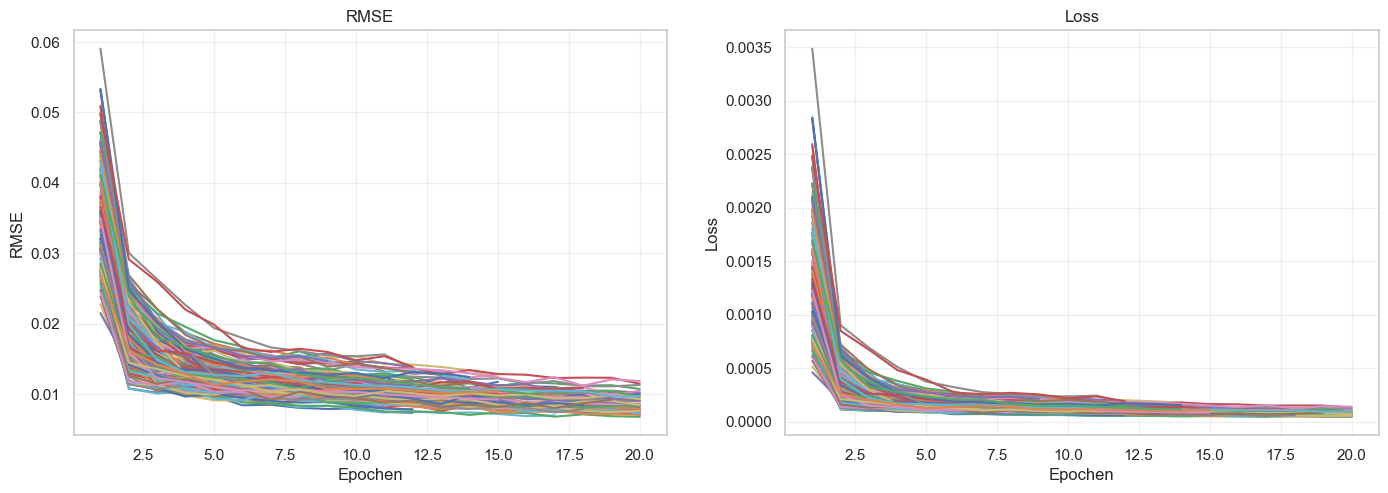

In [244]:
# Extrahieren der einzigartigen Modellnamen aus der gesamten Modellhistorie
model_names = complete_model_history['Modell'].unique()

# Erstellen einer Abbildung mit zwei Unterplotts (für RMSE und Loss)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot für RMSE
for model_name in model_names:
    # Extrahieren der Daten für das aktuelle Modell
    model_data = complete_model_history[complete_model_history['Modell'] == model_name]
    # Plotten der RMSE über den Epochen für das aktuelle Modell
    axs[0].plot(model_data['Epoch'], model_data['root_mean_squared_error'], label=f"{model_name}")

# Einstellungen für den ersten Plot (RMSE)
axs[0].set_title("RMSE")
axs[0].set_xlabel("Epochen")
axs[0].set_ylabel("RMSE")
axs[0].grid(alpha=0.3)

if len(model_names) <= 10:
    axs[0].legend()

# Plot für Loss
for model_name in model_names:
    # Extrahieren der Daten für das aktuelle Modell
    model_data = complete_model_history[complete_model_history['Modell'] == model_name]
    # Plotten des Loss über den Epochen für das aktuelle Modell
    axs[1].plot(model_data['Epoch'], model_data['loss'], label=f"{model_name}")

# Einstellungen für den zweiten Plot (Loss)
axs[1].set_title("Loss")
axs[1].set_xlabel("Epochen")
axs[1].set_ylabel("Loss")
axs[1].grid(alpha=0.3)

if len(model_names) <= 10:
    axs[1].legend()

# Anzeigen der Abbildung
plt.show()


#### Modellperformance

In diesem Abschnitt untersuchen wir die Modellperformance, indem wir die Effektivität verschiedener LSTM-Modelle mit unterschiedlichen Hyperparametern bewerten. Die dargestellten Diagramme zeigen den Verlauf des `Root Mean Squared Error` (RMSE) und des `Loss` während des Trainingsprozesses über 20 Epochen. Diese visuelle Darstellung ermöglicht es uns, ein tieferes Verständnis dafür zu entwickeln, wie die Variation der Hyperparameter die Lernfähigkeit und Vorhersagegenauigkeit der Modelle beeinflusst.

In [245]:
# Extrahieren der Spaltennamen aus dem Konfigurationsdictionary
hist_columns = list(config_dict.keys())

# Hinzufügen von neuen Spaltennamen für die Trainings- und Testgenauigkeit (Verlust und RMSE)
hist_columns.extend(['train_accuracy [loss, RMSE]', 'test_accuracy [loss, RMSE]'])

# Erstellen eines DataFrames für die Leistungshistorie
performance_hist = pd.DataFrame(hist, columns=hist_columns)

# Setzen der Indexwerte im DataFrame
performance_hist.index = np.arange(1, len(performance_hist)+1)

# Aufteilen der Werte in der Liste in zwei separate Spalten (Trainings- und Testgenauigkeit)
performance_hist[['train_loss', 'train_RMSE']] = performance_hist['train_accuracy [loss, RMSE]'].apply(pd.Series)
performance_hist[['test_loss', 'test_RMSE']] = performance_hist['test_accuracy [loss, RMSE]'].apply(pd.Series)

# Entfernen der alten Spalten für die kombinierte Genauigkeit
performance_hist.drop(['train_accuracy [loss, RMSE]', 'test_accuracy [loss, RMSE]'], axis=1, inplace=True)

# Sortieren des DataFrames nach Testverlust und Test-RMSE in aufsteigender Reihenfolge
performance_hist = performance_hist.sort_values(by=['test_loss', 'test_RMSE'], ascending=True)

# Anzeigen des DataFrames mit der Leistungshistorie
display(performance_hist)

n_neurons_input_layer  first_additional_layer  n_neurons_add_1   
10                     128                   False               64  \
73                      64                   False               64   
82                      64                   False               64   
11                     128                   False               64   
17                     128                   False               64   
..                     ...                     ...              ...   
61                     128                    True               64   
26                     128                   False               64   
131                     64                    True               64   
115                     64                    True               64   
88                      64                   False               64   

     second_additional_layer  n_neurons_add_2  third_additional_layer   
10                     False               32                   False  \
73                     False               32                   False   
82                     False               32                   False   
11                     False               32                   False   
17                     False               32                   False   
..                       ...              ...                     ...   
61                     False               32                    True   
26                     False               32                    True   
131                    False               32                    True   
115                    False               32                   False   
88                     False               32                   False   

     n_neurons_add_3  n_neurons_last_layer  n_batch_size  dropout  train_loss   
10                32                    32            32      0.2    0.000099  \
73                64                    32            32      0.2    0.000102   
82                32                    32            32      0.2    0.000108   
11                32                    32            64      0.2    0.000106   
17                32                     8            64      0.2    0.000141   
..               ...                   ...           ...      ...         ...   
61                64                     8            32      0.2    0.000266   
26                64                     8            64      0.2    0.000320   
131               64                    16            64      0.2    0.000385   
115               64                     8            32      0.2    0.000475   
88                32                     8            32      0.2    0.000555   

     train_RMSE  test_loss  test_RMSE  
10     0.009955   0.000868   0.029454  
73     0.010079   0.000888   0.029804  
82     0.010409   0.000944   0.030728  
11     0.010292   0.000981   0.031322  
17     0.011889   0.001064   0.032624  
..          ...        ...        ...  
61     0.016296   0.026459   0.162662  
26     0.017892   0.027930   0.167124  
131    0.019633   0.034052   0.184531  
115    0.021801   0.038760   0.196876  
88     0.023555   0.063333   0.251661  

[144 rows x 14 columns]

In [246]:
# Speichern des DataFrames mit der Leistungshistorie als csv-Datei
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%Y-%m-%d_%H-%M")
print("date and time =", dt_string)

# Speichern der Modellhistorie als csv-Datei
file_name = f'{dt_string}_model_performances.csv'
file_path = f'Model_Performance/{file_name}'
complete_model_history.to_csv(file_path, index=False)

date and time = 2024-01-29_18-17


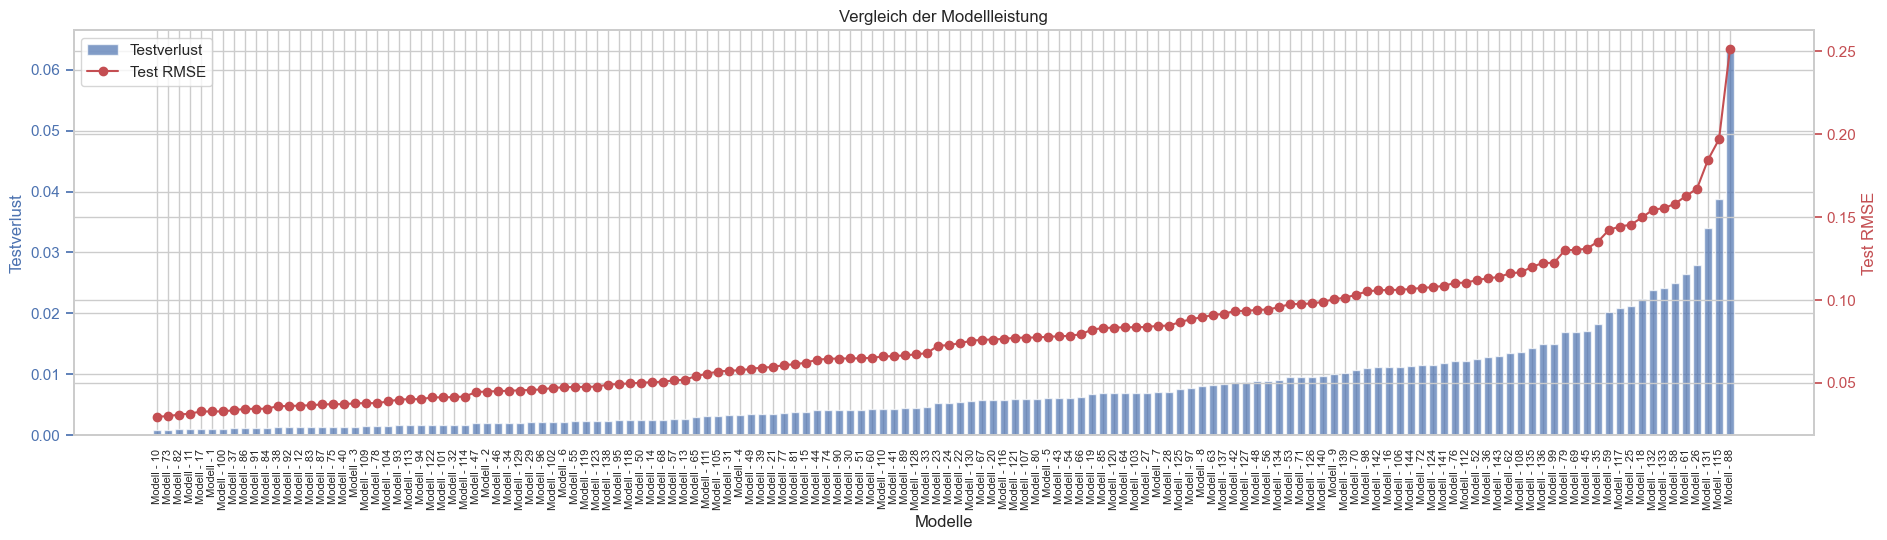

In [247]:
# Darstellung der Daten
fig, ax1 = plt.subplots(figsize=(20, 5))

# Erstellen von Modellnamen basierend auf den Indizes der Leistungshistorie
model_names = [f'Modell - {i}' for i in performance_hist.index]

# Balkendiagramm für den Testverlust
ax1.bar(model_names, performance_hist['test_loss'], color='b', alpha=0.7, label='Testverlust')
ax1.set_xlabel('Modelle')
ax1.set_ylabel('Testverlust', color='b')
ax1.tick_params('y', colors='b')

# Erstellen einer zweiten y-Achse für den Test-RMSE
ax2 = ax1.twinx()
ax2.plot(model_names, performance_hist['test_RMSE'], color='r', marker='o', label='Test RMSE')
ax2.set_ylabel('Test RMSE', color='r')
ax2.tick_params('y', colors='r')

# X-Achse Labels vertikal setzen und Schriftgröße anpassen
ax1.set_xticklabels(model_names, rotation=90, ha='center', fontsize=8)

# Hinzufügen der Legende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Anzeigen des Plots
plt.title('Vergleich der Modellleistung')
plt.show()


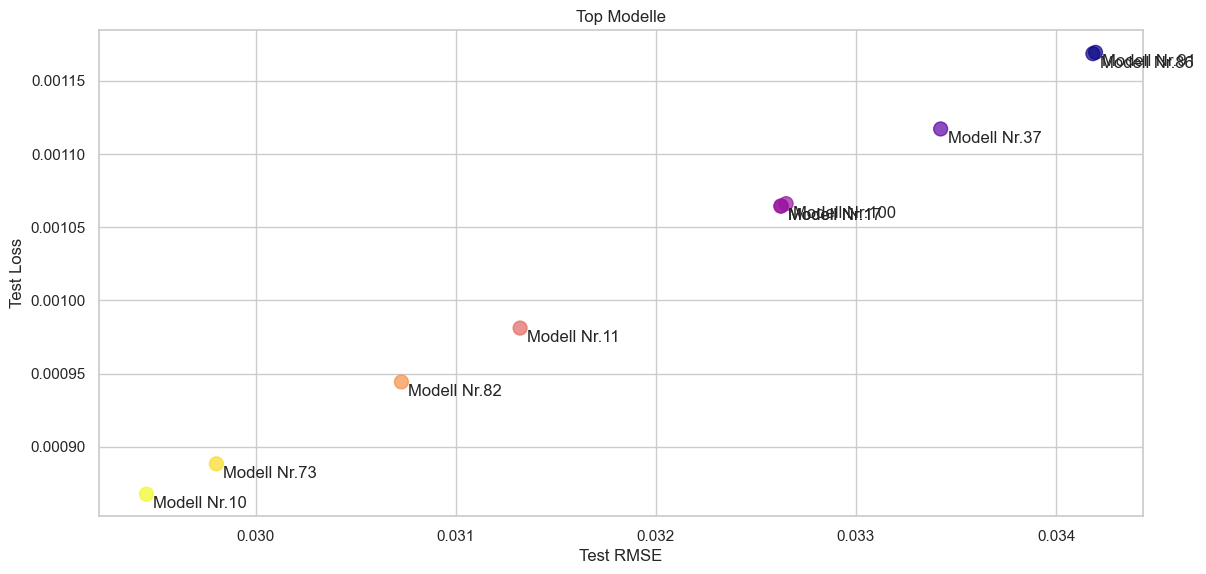

In [248]:
# Darstellung der Daten
fig, ax = plt.subplots(figsize=(12, 6))

# Erstellen von Modellnamen basierend auf den Indizes der Leistungshistorie
if len(performance_hist) <= 10:
    top_10_models = performance_hist
else:
    top_10_models = performance_hist[:10]

# Scatter Plot für Testverlust
scatter1 = ax.scatter(top_10_models['test_RMSE'], top_10_models['test_loss'], c=top_10_models['test_RMSE'], cmap='plasma_r', label='Testverlust', alpha=0.7, s=100)

# Erstellen der Achsenbeschriftungen
ax.set_xlabel('Test RMSE')
ax.set_ylabel('Test Loss')

# Annotations für die Top 10 Modelle
for index, row in top_10_models.iterrows():
    ax.annotate(f'Modell Nr.{index}', (row.test_RMSE, row.test_loss), textcoords="offset points", xytext=(5,-10), ha='left')

# Anzeigen des Plots
plt.title('Top Modelle')
plt.show()


#### Bestes Modell

Da wir nun die besten Hyperparamter gefunden haben werden wir damit erneut ein Modell Trainieren. Dieses kann dann fuer das Depolyment verwendet werden um die Vorhersage zu machen.

In [249]:
# Auswahl des besten Modells aus der Leistungshistorie (erste Zeile)
best_model = performance_hist[:1]

# Ausgabe der besten Kombination von Hyperparametern
print(f'Beste Kombination:')
print(f'Modell Nr: {best_model.index[0]}')
for column in best_model.iloc[:1, :-4].columns:
    print(f'{column} = {best_model.iloc[0, best_model.columns.get_loc(column)]}')

# Trennlinie
print('\n**************************')

# Ausgabe der Ergebnisse vor dem Tuning
print(f'Ergebnisse vor dem Tuning:\n Test Set RMSE: {np.round(results, 4)[1]}\n')

# Ausgabe der Ergebnisse nach dem Tuning (Test Set RMSE des besten Modells)
print(f'Ergebnisse nach dem Tuning:\n Test Set RMSE: {np.round(best_model["test_RMSE"].values[0], 4)}\n')

# Berechnung und Ausgabe der Verbesserung in Prozent
improvement_percentage = np.round((results[1] - best_model["test_RMSE"].values[0]) * 100 / np.round(results, 4)[1])
print(f'{improvement_percentage}% Verbesserung')


Beste Kombination:
Modell Nr: 10
n_neurons_input_layer = 128
first_additional_layer = False
n_neurons_add_1 = 64
second_additional_layer = False
n_neurons_add_2 = 32
third_additional_layer = False
n_neurons_add_3 = 32
n_neurons_last_layer = 32
n_batch_size = 32
dropout = 0.2

**************************
Ergebnisse vor dem Tuning:
 Test Set RMSE: 0.0333

Ergebnisse nach dem Tuning:
 Test Set RMSE: 0.0295

12.0% Verbesserung


In [250]:
# Extrahieren der Hyperparameter aus dem Besten Modell
n_neurons_input = best_model.iloc[0, best_model.columns.get_loc('n_neurons_input_layer')]
first_additional_layer = best_model.iloc[0, best_model.columns.get_loc('first_additional_layer')]
n_neurons_add_1 = best_model.iloc[0, best_model.columns.get_loc('n_neurons_add_1')] 
second_additional_layer = best_model.iloc[0, best_model.columns.get_loc('second_additional_layer')]
n_neurons_add_2 = best_model.iloc[0, best_model.columns.get_loc('n_neurons_add_2')]
third_additional_layer = best_model.iloc[0, best_model.columns.get_loc('third_additional_layer')]
n_neurons_add_3 = best_model.iloc[0, best_model.columns.get_loc('n_neurons_add_3')]
n_neurons_last = best_model.iloc[0, best_model.columns.get_loc('n_neurons_last_layer')]
n_batch_size = best_model.iloc[0, best_model.columns.get_loc('n_batch_size')]
dropout = best_model.iloc[0, best_model.columns.get_loc('dropout')]


print(f'Bestes Modell: \n')
print('--------------------------------------------------------------------')

# Erstellen des LSTM-Modells gemäß den Hyperparametern
regressor = Sequential(name=f'Bestes_Modell')
regressor.add(LSTM(name='Input_Layer_LSTM', units=n_neurons_input, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(dropout, name='Dropout_Layer-Input'))

if first_additional_layer:
    regressor.add(LSTM(name='Add_Hidden_Layer-1_LSTM', units=n_neurons_add_1, return_sequences=True))
    regressor.add(Dropout(dropout, name='Dropout_Layer-1'))

if second_additional_layer:
    regressor.add(LSTM(name='Add_Hidden_Layer-2_LSTM', units=n_neurons_add_2, return_sequences=True))
    regressor.add(Dropout(dropout, name='Dropout_Layer-2'))

if third_additional_layer:
    regressor.add(GRU(name='Add_Hidden_Layer-3_GRU', units=n_neurons_add_3, return_sequences=True))
    regressor.add(Dropout(dropout, name='Dropout_Layer-3'))

regressor.add(LSTM(name='Hidden_Layer_LSTM', units=n_neurons_last, return_sequences=False))
regressor.add(Dropout(dropout, name='Dropout_Layer'))
regressor.add(Dense(name='Output_Layer', units=1, activation='linear'))

# Kompilieren des Modells mit dem Adam-Optimizer und Mean Squared Error als Verlustfunktion
regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Ausgabe der Struktur des Modells
regressor.summary()

# Frühzeitiges Beenden, wenn keine Verbesserung auf der Validierung erfolgt
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Speichern des besten Modells während des Trainings
file_path = 'best_model.h5'
mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Training des Modells und Erfassen der Modellhistorie
best_model_history = regressor.fit(X_train, y_train, validation_split=0.3, epochs=50, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

# Evaluierung des Modells auf Trainings- und Testdaten
train_accuracy = regressor.evaluate(X_train, y_train, verbose=0) # gibt Verlust und Root Mean Squared Error zurück
test_accuracy = regressor.evaluate(X_test, y_test, verbose=0) # gibt Verlust und Root Mean Squared Error zurück


# Erstellen eines DataFrames für die Modellhistorie
best_model_history = pd.DataFrame(best_model_history.history)
best_model_history['Epoch'] = range(1, len(best_model_history) + 1)


print(f'\n\nBestes Modell \n Trainings-RMSE: {train_accuracy} und Test-RMSE: {test_accuracy}')

Bestes Modell: 

--------------------------------------------------------------------
Model: "Bestes_Modell"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer_LSTM (LSTM)     (None, 60, 128)           67072     
                                                                 
 Dropout_Layer-Input (Dropo  (None, 60, 128)           0         
 ut)                                                             
                                                                 
 Hidden_Layer_LSTM (LSTM)    (None, 32)                20608     
                                                                 
 Dropout_Layer (Dropout)     (None, 32)                0         
                                                                 
 Output_Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 87713 (342.63 KB)
T

##### Train Loss & RMSE

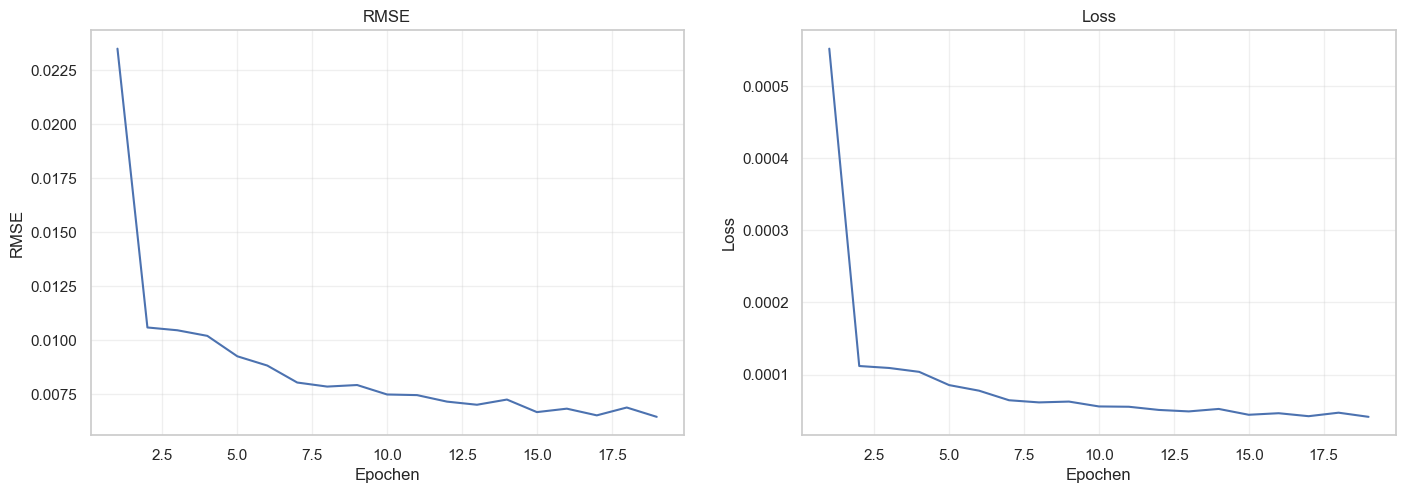

In [251]:
# Erstellen einer Abbildung mit zwei Unterplotts (für RMSE und Loss)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotten der RMSE über den Epochen für das aktuelle Modell
axs[0].plot(best_model_history['Epoch'], best_model_history['root_mean_squared_error'], label=f"{'Best Model'}")

# Einstellungen für den ersten Plot (RMSE)
axs[0].set_title("RMSE")
axs[0].set_xlabel("Epochen")
axs[0].set_ylabel("RMSE")
axs[0].grid(alpha=0.3)

# Plotten des Loss über den Epochen für das aktuelle Modell
axs[1].plot(best_model_history['Epoch'], best_model_history['loss'], label=f"{'Best Model'}")

# Einstellungen für den zweiten Plot (Loss)
axs[1].set_title("Loss")
axs[1].set_xlabel("Epochen")
axs[1].set_ylabel("Loss")
axs[1].grid(alpha=0.3)

# Anzeigen der Abbildung
plt.show()

##### Visualisierung

In [252]:
# # Plot der optimierten Modellarchitektur

# plot_model(regressor, to_file='best_model_plot.png', show_shapes=True, show_layer_names=True)

# # plot_model(model, show_shapes=True, show_layer_names=True, to_file='basis_model_plot.png')
# # Image('basis_model_plot.png')

In [253]:
%load_ext watermark
# Systeminformationen und Versionsnummern der verwendeten Bibliotheken
# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,numpy,scipy,matplotlib,seaborn,plotly,yfinance,pandas_datareader,scikit-learn,tensorflow,keras,ipywidgets,nbformat,pydot,watermark 

# date
print (" ")
%watermark -u -n -t -z 

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.12.0

pandas           : 2.0.1
numpy            : 1.24.2
scipy            : 1.10.1
matplotlib       : 3.7.1
seaborn          : 0.12.2
plotly           : 5.18.0
yfinance         : 0.2.33
pandas_datareader: 0.10.0
scikit-learn     : 1.2.2
tensorflow       : 2.15.0
keras            : 2.15.0
ipywidgets       : 8.1.1
nbformat         : 5.9.2
pydot            : 2.0.0
watermark        : 2.4.3

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 25 Model 33 Stepping 0, AuthenticAMD
CPU cores   : 16
Architecture: 64bit

 
Last updated: Mon Jan 29 2024 18:17:51W. Europe Standard Time



## Deployment
Wie wir sehen, ist die Vorhersage nicht so genau, aber sie folgt dem tatsächlichen Verlauf der Aktie sehr gut. Dies ist ein gutes Zeichen dafür, dass das Modell die Muster erkennt, die in den Daten vorhanden sind.

Ein richtiges Deplyment dieses Modells wuerde nun Folgen um sich das erzeugte Modell zunutzen zu machen und damit wirkliche Käufe und Verkäufe zu taetigen. Dies könnte man über ein Cloud-Deployment des Modells über (z.B. Azure ML) und eine programmatische Einbindung in einen Trading-Algorithmus erreichen, sooll jedoch kein Bestandteil dieses Notebooks sein.

# References
- [1] Venugopal, K. (2020, Dezember 29). Mathematical Introduction to Gradient Descent Learning Algorithm. Analytics Vidhya. https://medium.com/analytics-vidhya/mathematical-introduction-to-gradient-descent-learning-algorithm-8f1ebbff6455
- [2] Dhakal, S., Gautam, Y. & Bhattarai, A. Exploring a deep LSTM neural network to forecast daily PM2.5 concentration using meteorological parameters in Kathmandu Valley, Nepal. Air Qual Atmos Health 14, 83–96 (2021). https://doi.org/10.1007/s11869-020-00915-6      
- [3] baeldung, „Prevent the Vanishing Gradient Problem with LSTM | Baeldung on Computer Science“. Verfügbar under: https://www.baeldung.com/cs/lstm-vanishing-gradient-prevention#:~:text=To%20do%20so%2C%20LSTM%20leverages,retain%20information%20over%20longer%20sequences.&text=There%20are%20three%20gates%20included,gate%2C%20and%20the%20output%20gate.
- [4] K. Chowdhury, „10 Hyperparameters to keep an eye on for your LSTM model — and other tips“, Geek Culture. Zugegriffen: 3. Januar 2024. [Online]. Verfügbar unter: https://medium.com/geekculture/10-hyperparameters-to-keep-an-eye-on-for-your-lstm-model-and-other-tips-f0ff5b63fcd4
   S. Pardeshi, „CNN-LSTM Architecture and Image Captioning“, Analytics Vidhya. Zugegriffen: 3. Januar 2024. [Online]. Verfügbar unter: https://medium.com/analytics-vidhya/cnn-lstm-architecture-and-image-captioning-2351fc18e8d7
- [5] S. Krishnan, „How do determine the number of layers and neurons in the hidden layer?“, Geek Culture. Zugegriffen: 3. Januar 2024. [Online]. Verfügbar unter: https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3
- [6] „Stock Price Prediction LSTM Hyperparameter Tuning“. Zugegriffen: 3. Januar 2024. [Online]. Verfügbar unter: https://kaggle.com/code/kamyarazar/stock-price-prediction-lstm-hyperparameter-tuning
- [7] „Weights & Biases“. Zugegriffen: 5. Januar 2024. [Online]. Verfügbar unter: https://wandb.ai/authors/ayusht/reports/Using-GPUs-With-Keras-A-Tutorial-With-Code--VmlldzoxNjEyNjE
- [8] „How to Tune LSTM Hyperparameters with Keras for Time Series Forecasting. Zugegriffen: 5. Januar 2024. [Online]. Verfügbar unter: https://machinelearningmastery.com/tune-lstm-hyperparameters-keras-time-series-forecasting/
- [9] Wang, C.-F. (2019, Januar 8). The Vanishing Gradient Problem. Medium. https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484